In [1]:
# initiation 12/13/2023

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import constrNMPy
import os 
from matplotlib import gridspec
%config InlineBackend.figure_format = 'retina'

# os.getcwd() 
# # change the working directory to the folder where the data is stored

# color pallette
[gr,ye,re,bl,pu,ir,ak] = ['#8ECFC9', '#FFBE7A', '#FA7F6F', '#82B0D2','#BEB8DC', '#E7DAD2','#999999']
[vio, grb, lig, sil, aqua] = ['#8c84cf','#6699CC','#66CC99','#C0C0C0','#6db3bc']

# set the style of the plots
az.style.use("arviz-white")

# 1 Data Loading and Preprocessing

In [2]:
all_data = pd.read_csv('answer_all.csv')
all_data.head()
drop_SID = [23, 24, 26, 48, 93, 94, 96]
all_data = all_data[all_data['SID'].isin(drop_SID)==False]

In [4]:
# Arrange the data
Q_range = ['2AFC', '2AFC_pic', '3AFC']
Q_start_num = [1, 101, 121]
Q_end_num = [92, 120, 140]
Q_nums = list(np.arange(1,93)) + list(np.arange(101,121)) + list(np.arange(121,141))
# Q_range = ['2AFC', '2AFC_pic']
# Q_start_num = [1, 101]
# Q_end_num = [92, 120]
# Q_nums = list(np.arange(1,93)) + list(np.arange(101,121))
All_Q_Acc = pd.DataFrame(columns=['Q_idx', 'Q_type', 'Q_Acc_num', 'Q_Resp_num'])
for iQ in Q_nums:
    Q_idx_i = iQ
    Q_type_i = all_data[all_data['question'] == iQ]['type'].unique()[0]
    Q_Acc_num_i = all_data[all_data['question'] == iQ]['choice'].sum()
    Q_Resp_num_i = all_data[all_data['question'] == iQ]['choice'].count()
    All_Q_Acc = pd.concat([All_Q_Acc, pd.DataFrame([[Q_idx_i, Q_type_i, Q_Acc_num_i, Q_Resp_num_i]], columns=['Q_idx', 'Q_type', 'Q_Acc_num', 'Q_Resp_num'])], axis=0)

# Binomial Test to find CC, CW and Chance level questions
from scipy.stats import binomtest
from statsmodels.stats.multitest import multipletests

# Question types: CC-Consensually Correct, CW-Consensually Wrong, Chance
Q_types = {'CC', 'CW', 'Chance'}
all_Q_types = []

# binomial test for each participant
pval = []
for iQ in range(1, len(All_Q_Acc)+1):
    if iQ < 121:
        pval.append(binomtest(int(All_Q_Acc['Q_Acc_num'].iloc[iQ-1]), int(All_Q_Acc['Q_Resp_num'].iloc[iQ-1]), p=0.5).pvalue)
    else:
        pval.append(binomtest(int(All_Q_Acc['Q_Acc_num'].iloc[iQ-1]), int(All_Q_Acc['Q_Resp_num'].iloc[iQ-1]), p=1/3).pvalue)

# FDR correction
alpha = 0.10
reject, pval_corr = multipletests(pval, alpha=alpha, method='fdr_bh')[:2]

# assign question types
for iQ in range(1, len(All_Q_Acc)+1):
    if pval_corr[iQ-1] < alpha:
        if iQ < 121:
            if All_Q_Acc['Q_Acc_num'].iloc[iQ-1]/All_Q_Acc['Q_Resp_num'].iloc[iQ-1] > 0.5:
                all_Q_types.append('CC')
            else:
                all_Q_types.append('CW')
        else:
            if All_Q_Acc['Q_Acc_num'].iloc[iQ-1]/All_Q_Acc['Q_Resp_num'].iloc[iQ-1] > 1/3:
                all_Q_types.append('CC')
            else:
                all_Q_types.append('CW')
    else:
        all_Q_types.append('Chance')
  
            
All_Q_Acc['Q_Consensus'] = all_Q_types

print('The number of CC questions is: {}'.format(all_Q_types.count('CC')))
CC_idx = np.where(np.array(all_Q_types) == 'CC')[0]
print('Index of CC questions: {}'.format(CC_idx+1))
print()
print('The number of CW questions is: {}'.format(all_Q_types.count('CW')))
CW_idx = np.where(np.array(all_Q_types) == 'CW')[0]
print('Index of CW questions: {}'.format(CW_idx+1))
Chance_idx = np.where(np.array(all_Q_types) == 'Chance')[0]

The number of CC questions is: 54
Index of CC questions: [  1   3   9  11  12  13  14  15  20  23  25  26  31  33  40  42  43  44
  45  46  48  49  50  51  52  54  56  57  58  60  61  62  63  67  69  71
  75  79  81  83  87  93  94  96 100 101 104 105 106 113 127 130 131 132]

The number of CW questions is: 34
Index of CW questions: [  2   5   7  22  27  28  35  36  37  38  39  47  53  55  68  76  78  84
  88  89  90  95  98 102 103 108 109 110 115 116 118 120 126 128]


In [145]:
# Arrange the data
# Q_range = ['2AFC', '2AFC_pic', '3AFC']
# Q_start_num = [1, 101, 121]
# Q_end_num = [92, 120, 140]
# Q_nums = list(np.arange(1,93)) + list(np.arange(101,121)) + list(np.arange(121,141))
Q_range = ['2AFC', '2AFC_pic']
Q_start_num = [1, 101]
Q_end_num = [92, 120]
Q_nums = list(np.arange(1,93)) + list(np.arange(101,121))
all_Q_Acc = pd.DataFrame(columns=['Q_idx', 'Q_type', 'Q_Acc_num', 'Q_Resp_num'])
for iQ in Q_nums:
    Q_idx_i = iQ
    Q_type_i = all_data[all_data['question'] == iQ]['type'].unique()[0]
    Q_Acc_num_i = all_data[all_data['question'] == iQ]['choice'].sum()
    Q_Resp_num_i = all_data[all_data['question'] == iQ]['choice'].count()
    all_Q_Acc = pd.concat([all_Q_Acc, pd.DataFrame([[Q_idx_i, Q_type_i, Q_Acc_num_i, Q_Resp_num_i]], columns=['Q_idx', 'Q_type', 'Q_Acc_num', 'Q_Resp_num'])], axis=0)

# Using Quantiles to distinguish CC and CW questions

# Question types: CC-Consensually Correct, CW-Consensually Wrong, Chance
Q_types = {'CC', 'CW', 'Chance'}
all_Q_types = []

# all questions' accuracy
all_Q_Acc['Q_Acc'] = all_Q_Acc['Q_Acc_num']/all_Q_Acc['Q_Resp_num']
q_1 = all_Q_Acc['Q_Acc'].quantile(0.33)
q_2 = all_Q_Acc['Q_Acc'].quantile(0.66)

# assign question types
for iQ in range(1, len(all_Q_Acc)+1):
    if iQ < 121:
        if all_Q_Acc['Q_Acc'].iloc[iQ-1] > q_2:
            all_Q_types.append('CC')
        elif all_Q_Acc['Q_Acc'].iloc[iQ-1] < q_1:
            all_Q_types.append('CW')
        else:
            all_Q_types.append('Chance')
    else:
        if all_Q_Acc['Q_Acc'].iloc[iQ-1] > q_2:
            all_Q_types.append('CC')
        elif all_Q_Acc['Q_Acc'].iloc[iQ-1] < q_1:
            all_Q_types.append('CW')
        else:
            all_Q_types.append('Chance')
            
all_Q_Acc['Q_Consensus'] = all_Q_types


print('The number of CC questions is: {}'.format(all_Q_types.count('CC')))
CC_idx = np.where(np.array(all_Q_types) == 'CC')[0]
print('Index of CC questions: {}'.format(CC_idx+1))
print()
print('The number of CW questions is: {}'.format(all_Q_types.count('CW')))
CW_idx = np.where(np.array(all_Q_types) == 'CW')[0]
print('Index of CW questions: {}'.format(CW_idx+1))
Chance_idx = np.where(np.array(all_Q_types) == 'Chance')[0]

The number of CC questions is: 35
Index of CC questions: [  1   3  11  12  13  15  20  23  25  26  31  33  44  45  46  48  49  50
  52  57  58  60  62  67  69  71  75  81  87  93  94 101 104 105 106]

The number of CW questions is: 36
Index of CW questions: [  2   4   5   6   7  22  27  28  29  34  35  36  37  38  39  47  53  55
  66  68  76  78  82  84  88  89  90  95  98  99 102 103 108 109 110 111]


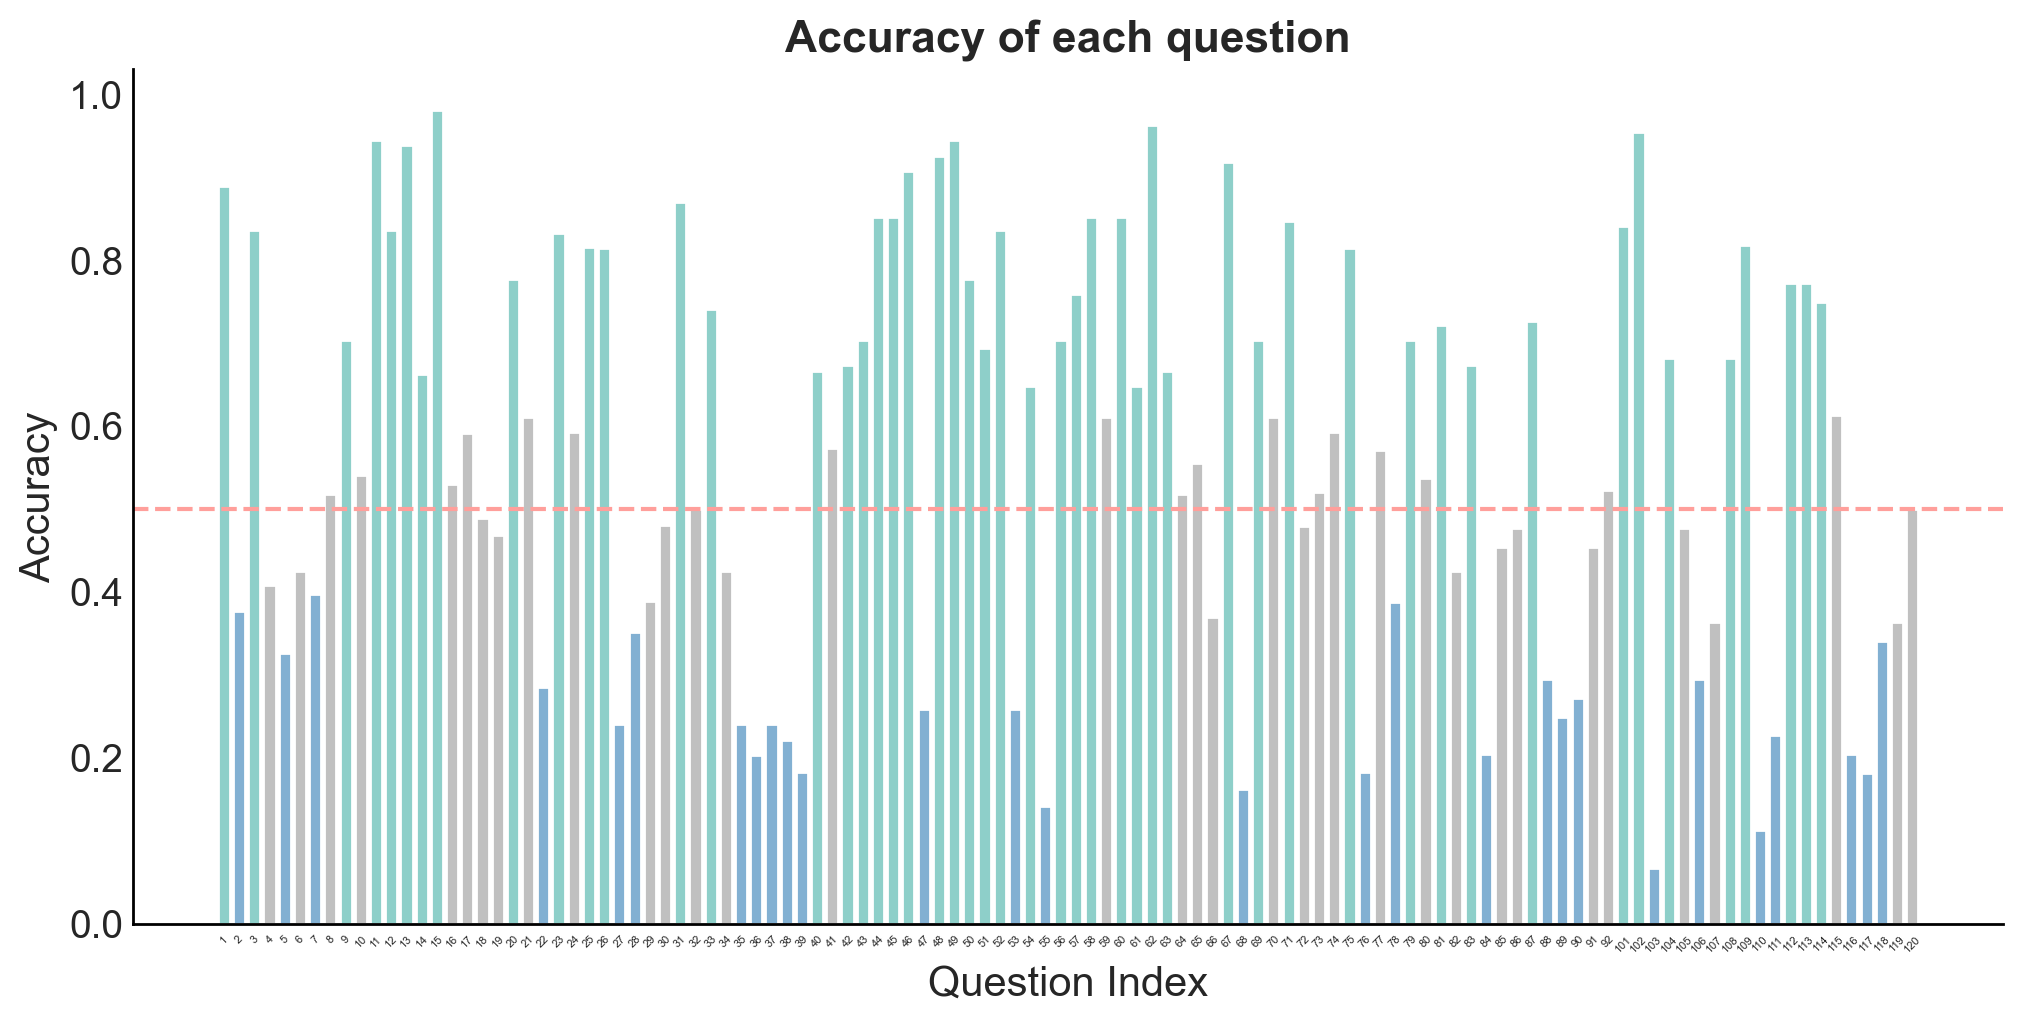

In [147]:
# visualize the data
# all the CC questions are colored gr, CW colored bl, and Chance colored sil
# All_Q_Acc = all_Q_Acc
color_pallette = []
for i in range(1, len(All_Q_Acc)+1):
    if All_Q_Acc['Q_Consensus'].iloc[i-1] == 'CC':
        color_pallette.append(gr)
    elif All_Q_Acc['Q_Consensus'].iloc[i-1] == 'CW':
        color_pallette.append(bl)
    else:
        color_pallette.append(sil)
    
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(range(1, len(All_Q_Acc)+1),All_Q_Acc['Q_Acc_num']/All_Q_Acc['Q_Resp_num'], color=color_pallette)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xticks(range(1, len(All_Q_Acc)+1), Q_nums, rotation=45, fontsize=4)
plt.xlabel('Question Index')
plt.ylabel('Accuracy')
plt.title('Accuracy of each question')

plt.show()

# 2 Processing on Absolute Value

## 2.1 Finding the CC and CW Questions

## 2.2 See the Correlation between the Consensus and Confidence

Based on Self Consistency Model, **individual's confidence should be correlated with the population consensus**, which is a reflection of the common implict knowledge of the population.

In this section, we do the correlation analysis between the confidence and the consensus. For CC questions, we expect to see a positive correlation between the confidence and the consensus. For CW questions, the consensus is actually th wrong answer, so we expect to see a negative correlation between the confidence and the mean accuracy.

Or, we could flip the sign of the consensus for CW questions, and then we expect to see a positive correlation between the confidence and the consensus.


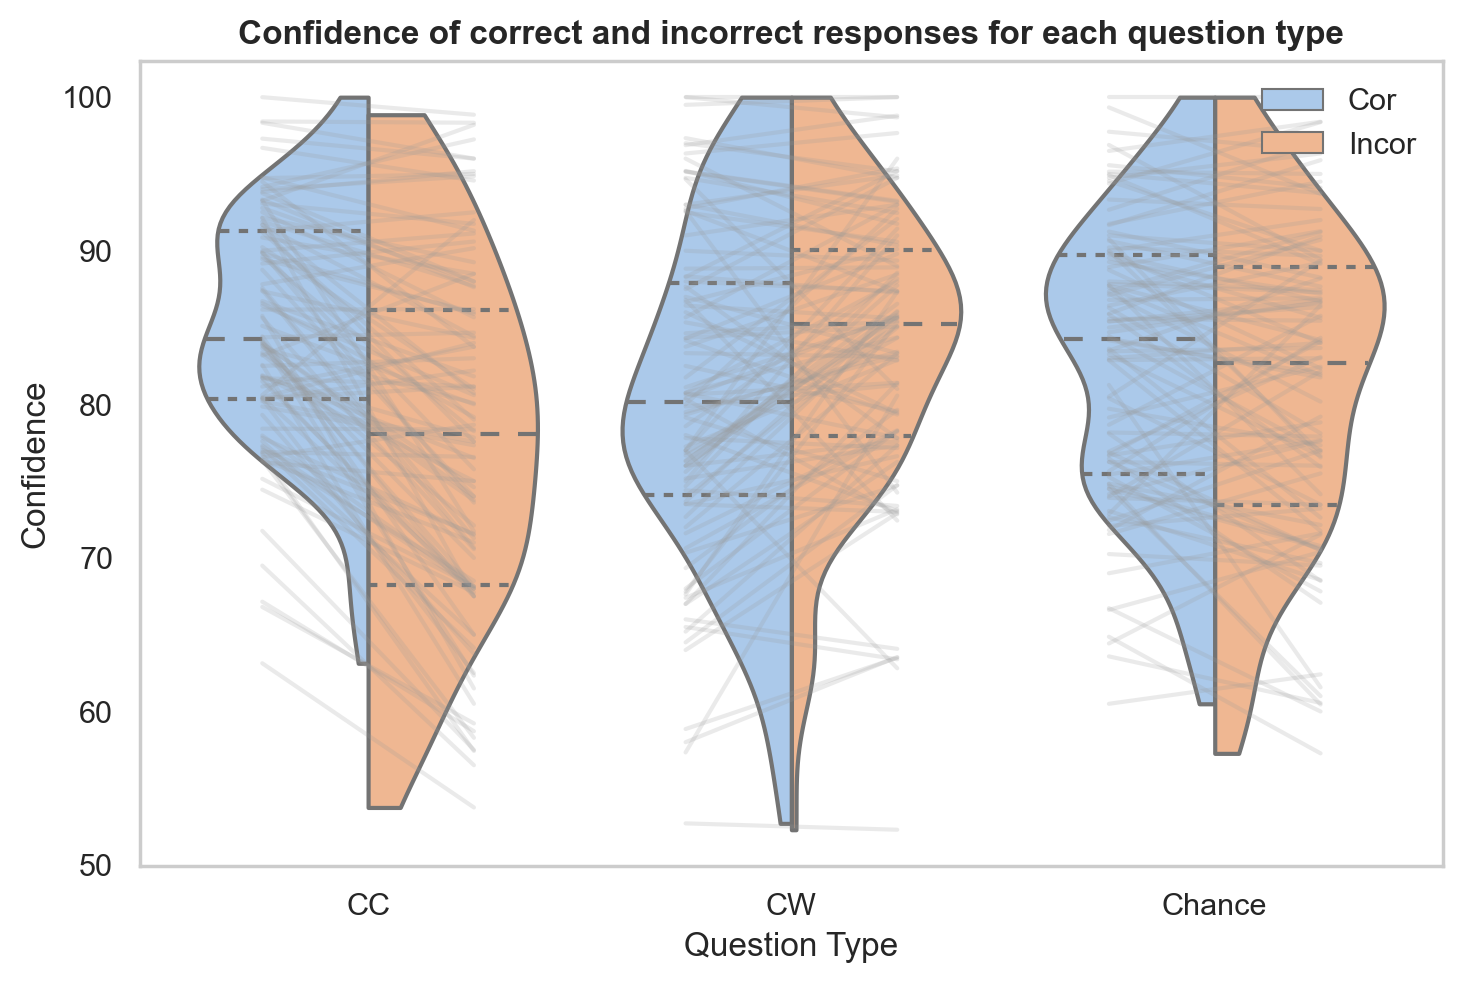

In [80]:
Subj_Confi_Cor_Incor = pd.DataFrame(columns=['Subj', 'CC_Cor_Confi', 'CW_Cor_Confi', 'Chance_Cor_Confi', 'CC_Incor_Confi', 'CW_Incor_Confi', 'Chance_Incor_Confi'])

for iSID in all_data['SID'].unique():
    CC_Cor_Confi = all_data[(all_data['SID'] == iSID) & (all_data['question'].isin(CC_idx+1)) & (all_data['choice'] == 1)]['confidence'].mean()
    CW_Cor_Confi = all_data[(all_data['SID'] == iSID) & (all_data['question'].isin(CW_idx+1)) & (all_data['choice'] == 1)]['confidence'].mean()
    Chance_Cor_Confi = all_data[(all_data['SID'] == iSID) & (all_data['question'].isin(Chance_idx+1)) & (all_data['choice'] == 1)]['confidence'].mean()
    CC_Incor_Confi = all_data[(all_data['SID'] == iSID) & (all_data['question'].isin(CC_idx+1)) & (all_data['choice'] == 0)]['confidence'].mean()
    CW_Incor_Confi = all_data[(all_data['SID'] == iSID) & (all_data['question'].isin(CW_idx+1)) & (all_data['choice'] == 0)]['confidence'].mean()
    Chance_Incor_Confi = all_data[(all_data['SID'] == iSID) & (all_data['question'].isin(Chance_idx+1)) & (all_data['choice'] == 0)]['confidence'].mean()
    Subj_Confi_Cor_Incor = pd.concat([Subj_Confi_Cor_Incor, pd.DataFrame([[iSID, CC_Cor_Confi, CW_Cor_Confi, Chance_Cor_Confi, CC_Incor_Confi, CW_Incor_Confi, Chance_Incor_Confi]]
                                                                         , columns=['Subj', 'CC_Cor_Confi', 'CW_Cor_Confi', 'Chance_Cor_Confi', 'CC_Incor_Confi', 'CW_Incor_Confi', 'Chance_Incor_Confi'])], axis=0)

# Draw the violin plot for confidence of correct and incorrect responses for each question type
# Rearrange the data into long format
Subj_Confi_Cor_Incor_long = pd.melt(Subj_Confi_Cor_Incor, id_vars=['Subj'], value_vars=['CC_Cor_Confi', 'CW_Cor_Confi', 'Chance_Cor_Confi', 'CC_Incor_Confi', 'CW_Incor_Confi', 'Chance_Incor_Confi'], var_name='Q_type', value_name='Confidence')
Subj_Confi_Cor_Incor_long['Correctness'] = Subj_Confi_Cor_Incor_long['Q_type'].str.split('_').str[1]
Subj_Confi_Cor_Incor_long['Q_type'] = Subj_Confi_Cor_Incor_long['Q_type'].str.split('_').str[0]

# Draw the violin plot, 3 sections and 2 response types
# fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="Q_type", y="Confidence", hue="Correctness", data=Subj_Confi_Cor_Incor_long, split=True, inner="quart", linewidth=1.5, scale='count', cut=0)
plt.xlabel('Question Type')
plt.ylabel('Confidence')
plt.title('Confidence of correct and incorrect responses for each question type')
plt.legend(loc='upper right')
# for each Q_type, draw the scatter plot of confidence of correct and incorrect responses for each subject and connect them
for iQ_type in Subj_Confi_Cor_Incor_long['Q_type'].unique():    
    for iSID in Subj_Confi_Cor_Incor_long['Subj'].unique():
        if iQ_type == 'CC':
            plt.plot([-0.25,0.25], Subj_Confi_Cor_Incor_long[(Subj_Confi_Cor_Incor_long['Subj'] == iSID) & (Subj_Confi_Cor_Incor_long['Q_type'] == iQ_type)]['Confidence'], color=ak, alpha=0.2)
        elif iQ_type == 'CW':
            plt.plot([0.75,1.25], Subj_Confi_Cor_Incor_long[(Subj_Confi_Cor_Incor_long['Subj'] == iSID) & (Subj_Confi_Cor_Incor_long['Q_type'] == iQ_type)]['Confidence'], color=ak, alpha=0.2)
        else:
            plt.plot([1.75,2.25], Subj_Confi_Cor_Incor_long[(Subj_Confi_Cor_Incor_long['Subj'] == iSID) & (Subj_Confi_Cor_Incor_long['Q_type'] == iQ_type)]['Confidence'], color=ak, alpha=0.2)

plt.grid(False)
plt.show()



In [347]:
Subj_Confi_Cor_Incor.to_csv('Subj_Confi_Cor_Incor.csv', index=False)

In [106]:
all_data

,choice,confidence,rt,question,type,set,SID
0,1.0,100.0,17.681,1,2AFC,1,1
1,1.0,51.0,11.622,1,2AFC,1,2
2,1.0,100.0,13.840,1,2AFC,1,3
3,1.0,100.0,13.774,1,2AFC,1,4
4,1.0,52.0,19.970,1,2AFC,1,5
...,...,...,...,...,...,...,...
8522,0.0,34.0,5.482,140,3AFC,2,101
8523,1.0,73.0,4.500,140,3AFC,2,102
8524,1.0,65.0,8.380,140,3AFC,2,103
8525,1.0,43.0,4.505,140,3AFC,2,104


## 2.3 Correlation between the Confidence and the Consensus

In [107]:
Ques_Consen_Confi_Correlation = pd.DataFrame(columns=['Q_idx', 'Q_type', 'Q_Consen', 'Q_Confi','Consen_type'])

for iQ in Q_nums:
    Q_idx_i = iQ
    Q_type_i = all_data[all_data['question'] == iQ]['type'].unique()[0]
    Q_Consen_i = all_data[all_data['question'] == iQ]['choice'].mean()
    Q_Confi_i = all_data[all_data['question'] == iQ]['confidence'].mean()
    Consen_type_i = All_Q_Acc[All_Q_Acc['Q_idx'] == iQ]['Q_Consensus'].unique()[0]
    Ques_Consen_Confi_Correlation = pd.concat([Ques_Consen_Confi_Correlation, pd.DataFrame([[Q_idx_i, Q_type_i, Q_Consen_i, Q_Confi_i, Consen_type_i]], columns=['Q_idx', 'Q_type', 'Q_Consen', 'Q_Confi','Consen_type'])], axis=0)

# Extract the data for each question type
CC_Ques_Consen_Confi_Correlation = Ques_Consen_Confi_Correlation[Ques_Consen_Confi_Correlation['Consen_type'] == 'CC']
CW_Ques_Consen_Confi_Correlation = Ques_Consen_Confi_Correlation[Ques_Consen_Confi_Correlation['Consen_type'] == 'CW']
# Flip the Consen in CW questions
CW_Ques_Consen_Confi_Correlation['Q_Consen'] = 1 - CW_Ques_Consen_Confi_Correlation['Q_Consen']
Combined = pd.concat([CC_Ques_Consen_Confi_Correlation, CW_Ques_Consen_Confi_Correlation], axis=0)

/var/folders/xc/yqcd0q9s39x5rnx183pvw5qw0000gn/T/ipykernel_76883/397337828.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CW_Ques_Consen_Confi_Correlation['Q_Consen'] = 1 - CW_Ques_Consen_Confi_Correlation['Q_Consen']


The correlation between consensus and confidence is: 0.3180051842216356, p-value is: 0.004826348629602506
The correlation between consensus and confidence for CC questions is: 0.446424181810157, p-value is: 0.0013033024210066355
The correlation between consensus and confidence for CW questions is: 0.045789028061332386, p-value is: 0.817029540372503


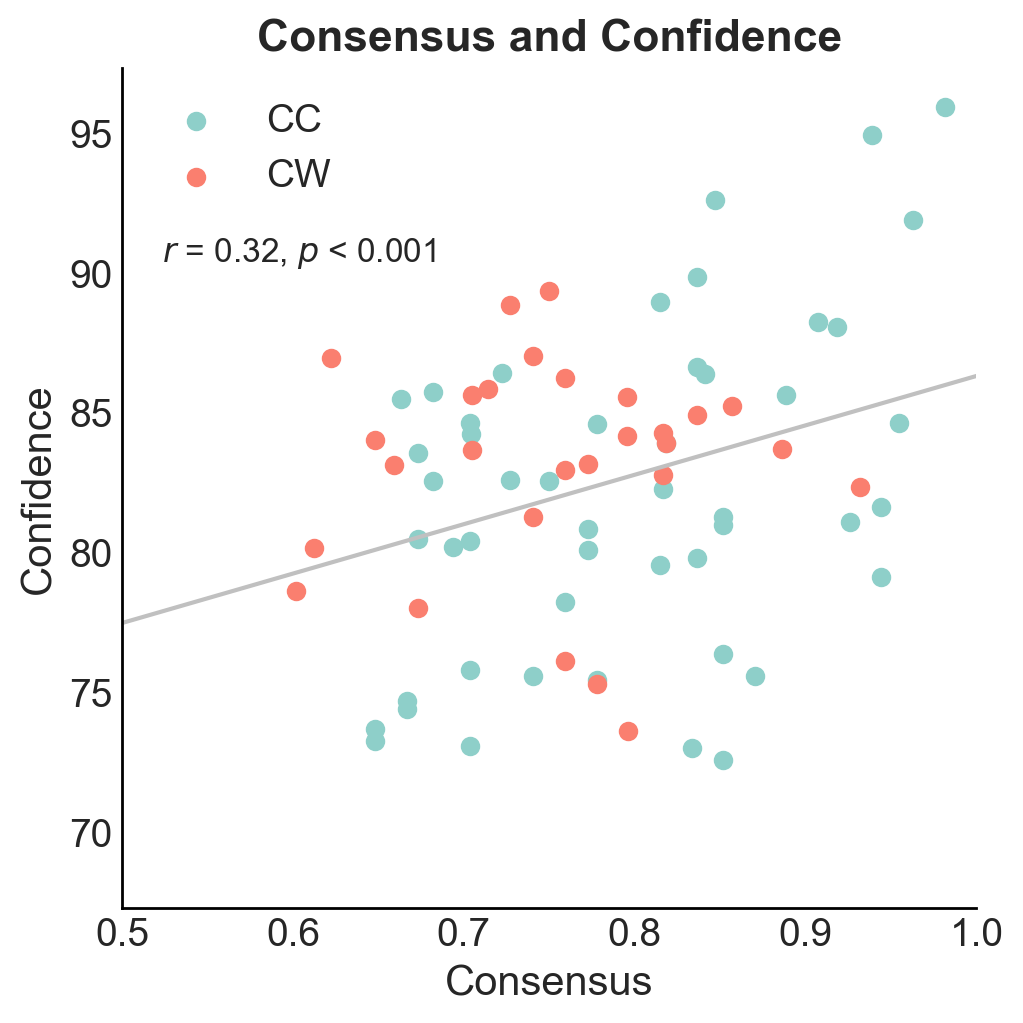

In [108]:
# Run Correlation
from scipy.stats import pearsonr
result = pearsonr(Combined['Q_Consen'], Combined['Q_Confi'])
print('The correlation between consensus and confidence is: {}, p-value is: {}'.format(result[0], result[1]))
result = pearsonr(CC_Ques_Consen_Confi_Correlation['Q_Consen'], CC_Ques_Consen_Confi_Correlation['Q_Confi'])
print('The correlation between consensus and confidence for CC questions is: {}, p-value is: {}'.format(result[0], result[1]))
result = pearsonr(CW_Ques_Consen_Confi_Correlation['Q_Consen'], CW_Ques_Consen_Confi_Correlation['Q_Confi'])
print('The correlation between consensus and confidence for CW questions is: {}, p-value is: {}'.format(result[0], result[1]))

# Draw the scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(CC_Ques_Consen_Confi_Correlation['Q_Consen'], CC_Ques_Consen_Confi_Correlation['Q_Confi'], color=gr, label='CC')
plt.scatter(CW_Ques_Consen_Confi_Correlation['Q_Consen'], CW_Ques_Consen_Confi_Correlation['Q_Confi'], color=re, label='CW')
plt.legend(loc='upper left')
# Draw the regression line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(Combined['Q_Consen'], Combined['Q_Confi'])
# write the r and p on the plot
plt.text(0.15, 0.75, '$r$ = {:.2f}, $p$ < 0.001'.format(r_value, p_value), fontsize=12, transform=plt.gcf().transFigure)


plt.plot([0,1], [intercept, intercept+slope], color= sil , label='Regression Line')
plt.xlim([0.5,1])
plt.grid(False)
plt.xlabel('Consensus')
plt.ylabel('Confidence')
plt.title('Consensus and Confidence')

plt.show()


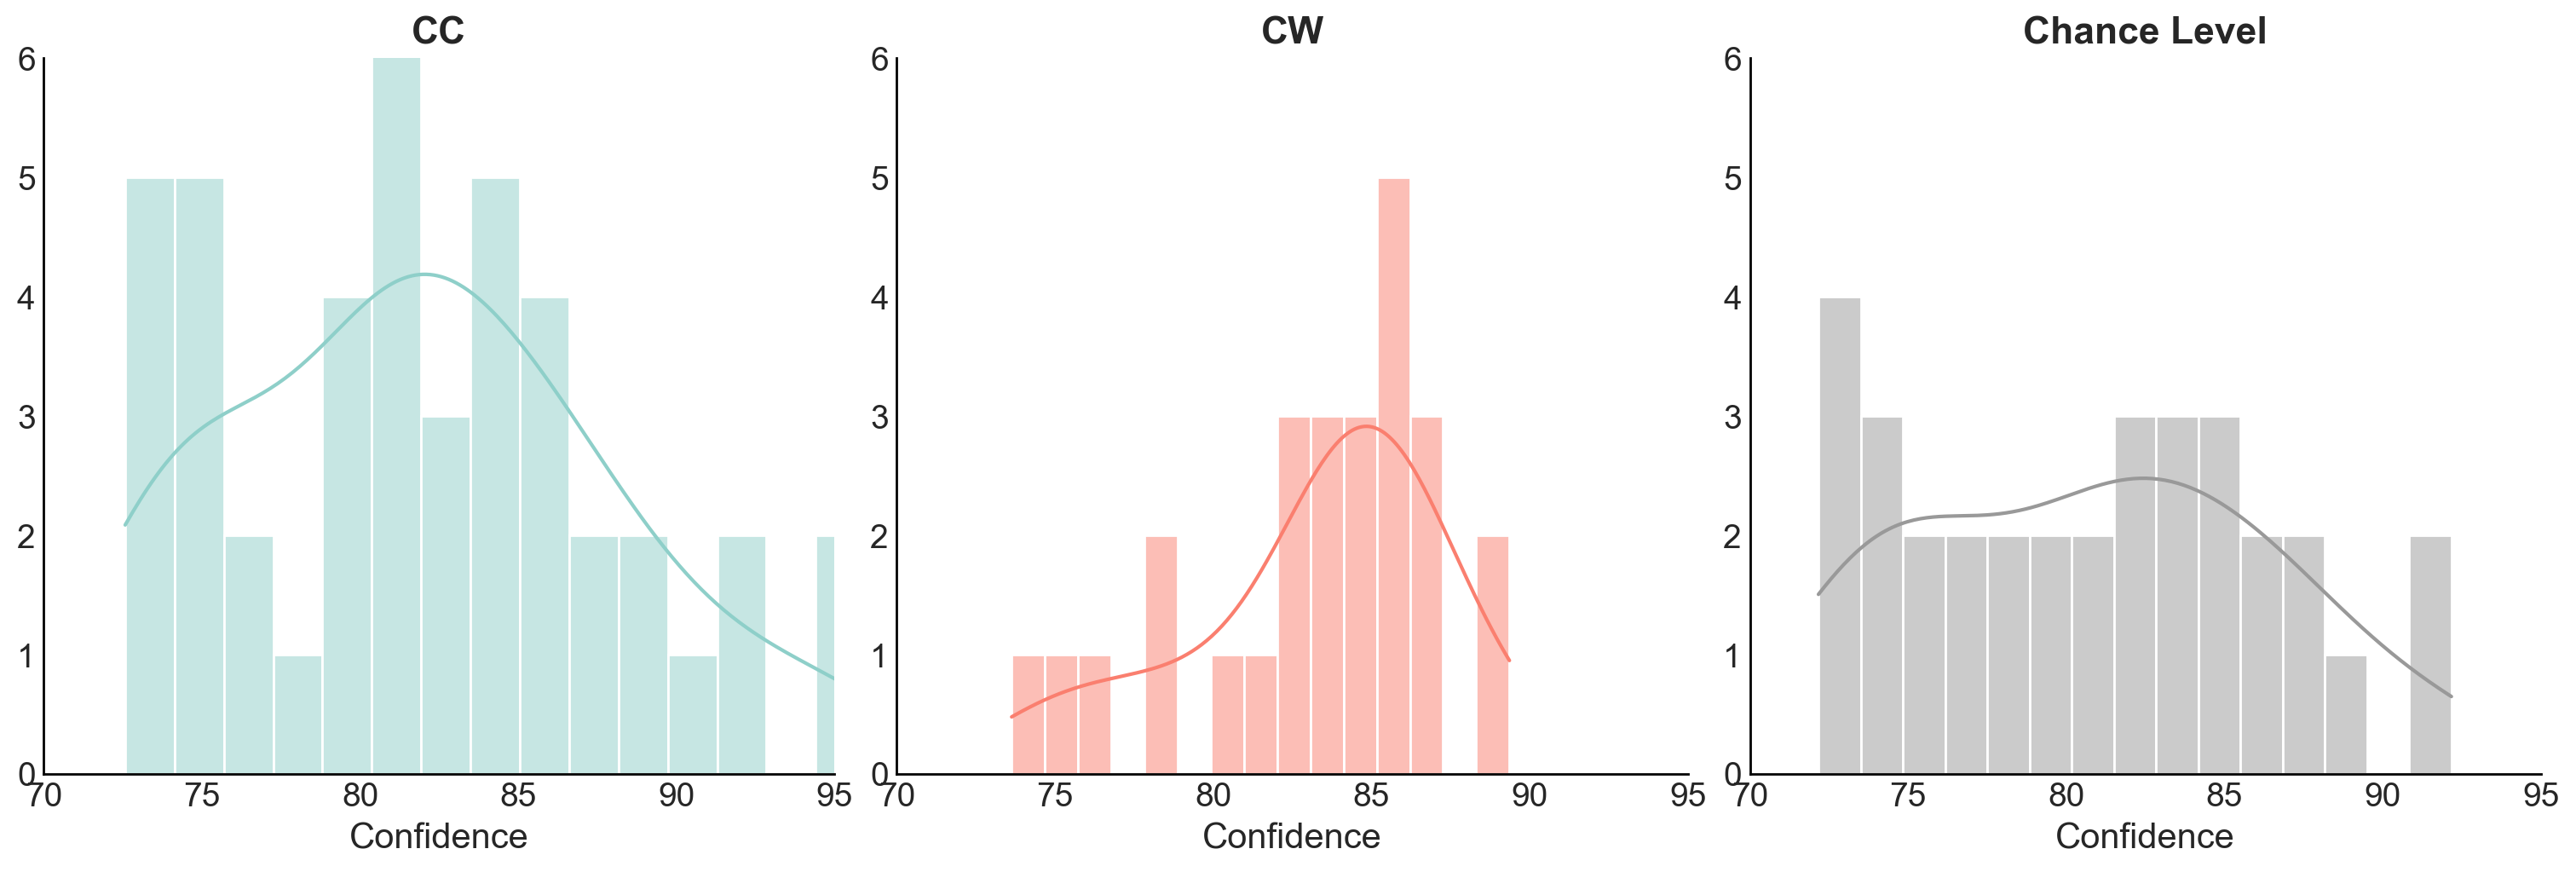

In [109]:
# plot the histogram of confidence for each question type
_, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
CC_hist = {'Q_{}'.format(i): all_data[(all_data['question'] == i)]['confidence'].mean() for i in CC_idx+1}
CW_hist = {'Q_{}'.format(i): all_data[(all_data['question'] == i)]['confidence'].mean() for i in CW_idx+1}
Chance_hist = {'Q_{}'.format(i): all_data[(all_data['question'] == i)]['confidence'].mean() for i in Chance_idx+1}
CC_hist_combined = [CC_hist['Q_{}'.format(i)] for i in CC_idx+1]
CW_hist_combined = [CW_hist['Q_{}'.format(i)] for i in CW_idx+1]
Chance_hist_combined = [Chance_hist['Q_{}'.format(i)] for i in Chance_idx+1]
# set the grid off rc

az.style.use("arviz-doc")
az.style.use("arviz-white")
# draw hist then use kde to draw the line
sns.histplot(CC_hist_combined, color=gr, ax=axes[0], kde=True, label='CC', bins=15)
axes[0].set_title('CC')
sns.histplot(CW_hist_combined, color=re, ax=axes[1], kde=True, label='CW', bins=15)
axes[1].set_title('CW')
sns.histplot(Chance_hist_combined, color=ak, ax=axes[2], kde=True, label='Chance', bins=15)
axes[2].set_title('Chance Level')
for i in range(3):
    # axes[i].legend(loc='upper right')
    axes[i].set_xlim([70,95])
    axes[i].set_xlabel('Confidence')
    axes[i].set_xticks([70,80,90], minor=True)
    # the ticks is shown:
    axes[i].tick_params(axis='x', which='minor', bottom=True)
    axes[i].set_ylabel('')
    axes[i].set_ylim([0,6])
    axes[i].grid(False)
plt.show()




# axes[0].hist(CC_hist_combined, color=gr, label='CC', bin = 10)
# axes[0].set_title('CC')
# axes[1].hist(CW_hist_combined, color=bl, label='CW')
# axes[1].set_title('CW')
# axes[2].hist(Chance_hist_combined, color=sil, label='Chance')
# axes[2].set_title('Chance')


## 3 Process on Normalized Value

In [91]:
def normalization(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

# normalize the subject confidence across all questions
all_data = pd.read_csv('answer_all.csv')
all_data.head()
drop_SID = [23, 24, 26, 48, 93, 94, 96]
all_data = all_data[all_data['SID'].isin(drop_SID)==False]

norm_all_data = all_data.copy()
for iSub in all_data['SID'].unique():
    norm_all_data.loc[norm_all_data['SID'] == iSub, 'confidence'] = normalization(norm_all_data[norm_all_data['SID'] == iSub]['confidence'])

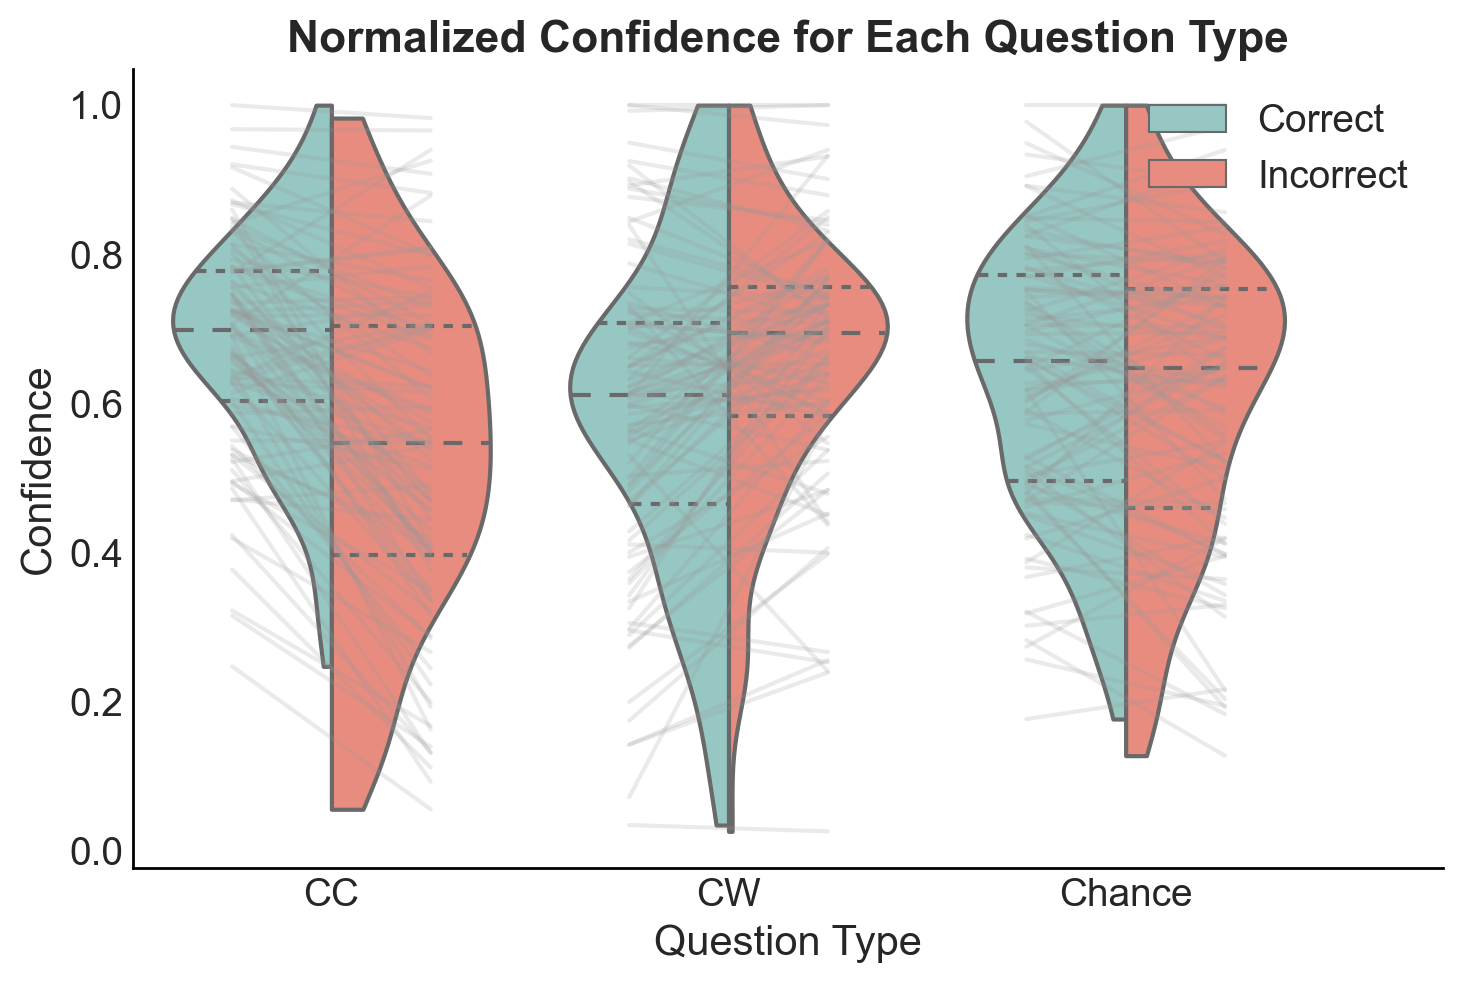

In [110]:
Norm_Subj_Confi_Cor_Incor = pd.DataFrame(columns=['Subj', 'CC_Cor_Confi', 'CW_Cor_Confi', 'Chance_Cor_Confi', 'CC_Incor_Confi', 'CW_Incor_Confi', 'Chance_Incor_Confi'])

for iSID in norm_all_data['SID'].unique():
    CC_Cor_Confi = norm_all_data[(norm_all_data['SID'] == iSID) & (norm_all_data['question'].isin(CC_idx+1)) & (norm_all_data['choice'] == 1)]['confidence'].mean()
    CW_Cor_Confi = norm_all_data[(norm_all_data['SID'] == iSID) & (norm_all_data['question'].isin(CW_idx+1)) & (norm_all_data['choice'] == 1)]['confidence'].mean()
    Chance_Cor_Confi = norm_all_data[(norm_all_data['SID'] == iSID) & (norm_all_data['question'].isin(Chance_idx+1)) & (norm_all_data['choice'] == 1)]['confidence'].mean()
    CC_Incor_Confi = norm_all_data[(norm_all_data['SID'] == iSID) & (norm_all_data['question'].isin(CC_idx+1)) & (norm_all_data['choice'] == 0)]['confidence'].mean()
    CW_Incor_Confi = norm_all_data[(norm_all_data['SID'] == iSID) & (norm_all_data['question'].isin(CW_idx+1)) & (norm_all_data['choice'] == 0)]['confidence'].mean()
    Chance_Incor_Confi = norm_all_data[(norm_all_data['SID'] == iSID) & (norm_all_data['question'].isin(Chance_idx+1)) & (norm_all_data['choice'] == 0)]['confidence'].mean()
    Norm_Subj_Confi_Cor_Incor = pd.concat([Norm_Subj_Confi_Cor_Incor, pd.DataFrame([[iSID, CC_Cor_Confi, CW_Cor_Confi, Chance_Cor_Confi, CC_Incor_Confi, CW_Incor_Confi, Chance_Incor_Confi]]
                                                                         , columns=['Subj', 'CC_Cor_Confi', 'CW_Cor_Confi', 'Chance_Cor_Confi', 'CC_Incor_Confi', 'CW_Incor_Confi', 'Chance_Incor_Confi'])], axis=0)

# Draw the violin plot for confidence of correct and incorrect responses for each question type
# Rearrange the data into long format
Norm_Subj_Confi_Cor_Incor_long = pd.melt(Norm_Subj_Confi_Cor_Incor, id_vars=['Subj'], value_vars=['CC_Cor_Confi', 'CW_Cor_Confi', 'Chance_Cor_Confi', 'CC_Incor_Confi', 'CW_Incor_Confi', 'Chance_Incor_Confi'], var_name='Q_type', value_name='Confidence')
Norm_Subj_Confi_Cor_Incor_long['Correctness'] = Norm_Subj_Confi_Cor_Incor_long['Q_type'].str.split('_').str[1]
Norm_Subj_Confi_Cor_Incor_long['Q_type'] = Norm_Subj_Confi_Cor_Incor_long['Q_type'].str.split('_').str[0]

Norm_Subj_Confi_Cor_Incor_long['Correctness'].replace({'Cor': 'Correct', 'Incor': 'Incorrect'}, inplace=True)
# Draw the violin plot, 3 sections and 2 response types
# fig, ax = plt.subplots(figsize=(10, 5))
az.style.use("arviz-white")
# sns.set(palette=[gr, re], color_codes=True)
sns.violinplot(x="Q_type", y="Confidence", hue="Correctness", data= Norm_Subj_Confi_Cor_Incor_long, split=True, inner="quart", linewidth=1.5, scale='count', cut=0, palette=[gr, re])
plt.xlabel('Question Type')
plt.ylabel('Confidence')
plt.title('Normalized Confidence for Each Question Type')
plt.legend(loc='upper right')
# for each Q_type, draw the scatter plot of confidence of correct and incorrect responses for each subject and connect them
for iQ_type in Norm_Subj_Confi_Cor_Incor_long['Q_type'].unique():    
    for iSID in Norm_Subj_Confi_Cor_Incor_long['Subj'].unique():
        if iQ_type == 'CC':
            plt.plot([-0.25,0.25], Norm_Subj_Confi_Cor_Incor_long[(Norm_Subj_Confi_Cor_Incor_long['Subj'] == iSID) & (Norm_Subj_Confi_Cor_Incor_long['Q_type'] == iQ_type)]['Confidence'], color=ak, alpha=0.2)
        elif iQ_type == 'CW':
            plt.plot([0.75,1.25], Norm_Subj_Confi_Cor_Incor_long[(Norm_Subj_Confi_Cor_Incor_long['Subj'] == iSID) & (Norm_Subj_Confi_Cor_Incor_long['Q_type'] == iQ_type)]['Confidence'], color=ak, alpha=0.2)
        else:
            plt.plot([1.75,2.25], Norm_Subj_Confi_Cor_Incor_long[(Norm_Subj_Confi_Cor_Incor_long['Subj'] == iSID) & (Norm_Subj_Confi_Cor_Incor_long['Q_type'] == iQ_type)]['Confidence'], color=ak, alpha=0.2)
plt.xlim([-0.5,2.8])
plt.grid(False)
plt.show()



In [122]:
# Normalized Confidence - Consensus Correlation
Norm_Ques_Consen_Confi_Correlation = pd.DataFrame(columns=['Q_idx', 'Q_type', 'Q_Consen', 'Q_Confi','Consen_type'])

for iQ in Q_nums:
    Q_idx_i = iQ
    Q_type_i = norm_all_data[norm_all_data['question'] == iQ]['type'].unique()[0]
    Q_Consen_i = norm_all_data[norm_all_data['question'] == iQ]['choice'].mean()
    Q_Confi_i = norm_all_data[norm_all_data['question'] == iQ]['confidence'].mean()
    Consen_type_i = All_Q_Acc[All_Q_Acc['Q_idx'] == iQ]['Q_Consensus'].unique()[0]
    Norm_Ques_Consen_Confi_Correlation = pd.concat([Norm_Ques_Consen_Confi_Correlation, pd.DataFrame([[Q_idx_i, Q_type_i, Q_Consen_i, Q_Confi_i, Consen_type_i]], columns=['Q_idx', 'Q_type', 'Q_Consen', 'Q_Confi','Consen_type'])], axis=0)

# Extract the data for each question type
CC_Norm_Ques_Consen_Confi_Correlation = Norm_Ques_Consen_Confi_Correlation[Norm_Ques_Consen_Confi_Correlation['Consen_type'] == 'CC']
CW_Norm_Ques_Consen_Confi_Correlation = Norm_Ques_Consen_Confi_Correlation[Norm_Ques_Consen_Confi_Correlation['Consen_type'] == 'CW']
# Flip the Consen in CW questions
CW_Norm_Ques_Consen_Confi_Correlation['Q_Consen'] = 1 - CW_Norm_Ques_Consen_Confi_Correlation['Q_Consen']
Norm_Combined = pd.concat([CC_Norm_Ques_Consen_Confi_Correlation, CW_Norm_Ques_Consen_Confi_Correlation], axis=0)

/var/folders/xc/yqcd0q9s39x5rnx183pvw5qw0000gn/T/ipykernel_76883/1941702531.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CW_Norm_Ques_Consen_Confi_Correlation['Q_Consen'] = 1 - CW_Norm_Ques_Consen_Confi_Correlation['Q_Consen']


(after normalization) The correlation between consensus and confidence is: 0.3049098187553546, p-value is: 0.007010597515904408
(after normalization) The correlation between consensus and confidence for CC questions is: 0.442109795261928, p-value is: 0.0014701564578669384
(after normalization) The correlation between consensus and confidence for CW questions is: 0.01924963310562192, p-value is: 0.9225483074702365


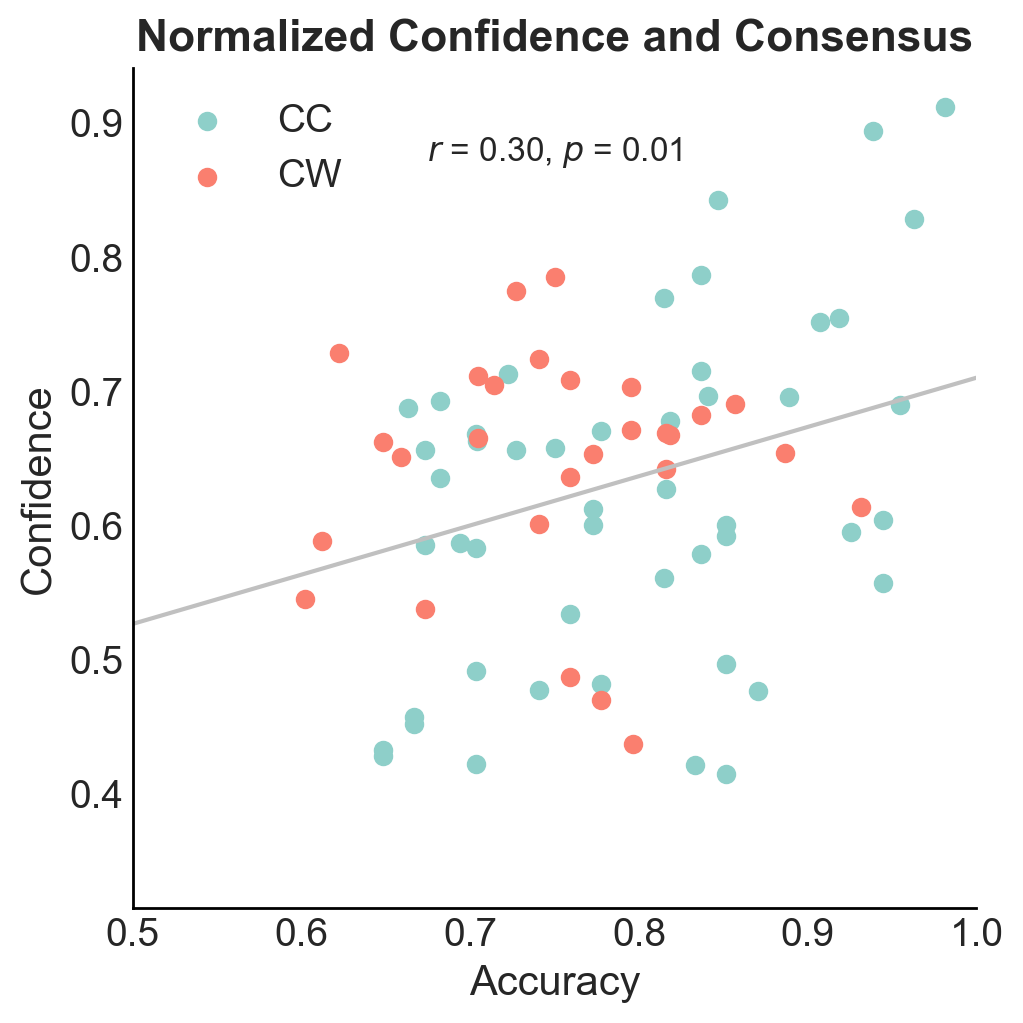

In [124]:
# Run Correlation
from scipy.stats import pearsonr
result = pearsonr(Norm_Combined['Q_Consen'], Norm_Combined['Q_Confi'])
print('(after normalization) The correlation between consensus and confidence is: {}, p-value is: {}'.format(result[0], result[1]))
result = pearsonr(CC_Norm_Ques_Consen_Confi_Correlation['Q_Consen'], CC_Norm_Ques_Consen_Confi_Correlation['Q_Confi'])
print('(after normalization) The correlation between consensus and confidence for CC questions is: {}, p-value is: {}'.format(result[0], result[1]))
result = pearsonr(CW_Norm_Ques_Consen_Confi_Correlation['Q_Consen'], CW_Norm_Ques_Consen_Confi_Correlation['Q_Confi'])
print('(after normalization) The correlation between consensus and confidence for CW questions is: {}, p-value is: {}'.format(result[0], result[1]))

# Draw the scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
# plt.scatter(Norm_Ques_Consen_Confi_Correlation['Q_Consen'], Norm_Ques_Consen_Confi_Correlation['Q_Confi'], color=ak, label='Chance')
plt.scatter(CC_Norm_Ques_Consen_Confi_Correlation['Q_Consen'], CC_Norm_Ques_Consen_Confi_Correlation['Q_Confi'], color=gr, label='CC')
plt.scatter(CW_Norm_Ques_Consen_Confi_Correlation['Q_Consen'], CW_Norm_Ques_Consen_Confi_Correlation['Q_Confi'], color=re, label='CW')
# Draw the regression line
plt.legend(loc='upper left')
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(Norm_Combined['Q_Consen'], Norm_Combined['Q_Confi'])
plt.plot([0,1], [intercept, intercept+slope], color= sil , label='Regression Line')
# write down the r and p value
plt.text(0.5, 0.9, '$r$ = {:.2f}, $p$ = {:.2f}'.format(r_value, p_value), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlim([0.5,1])
plt.grid(False)
plt.xlabel('Accuracy')
plt.ylabel('Confidence')
plt.title('Normalized Confidence and Consensus')

plt.show()


(after normalization) The correlation between consensus and confidence is: 0.005206494806501625, p-value is: 0.9641552702147018
(after normalization) The correlation between consensus and confidence for CC questions is: 0.442109795261928, p-value is: 0.0014701564578669384
(after normalization) The correlation between consensus and confidence for CW questions is: -0.019249633105621895, p-value is: 0.9225483074702365


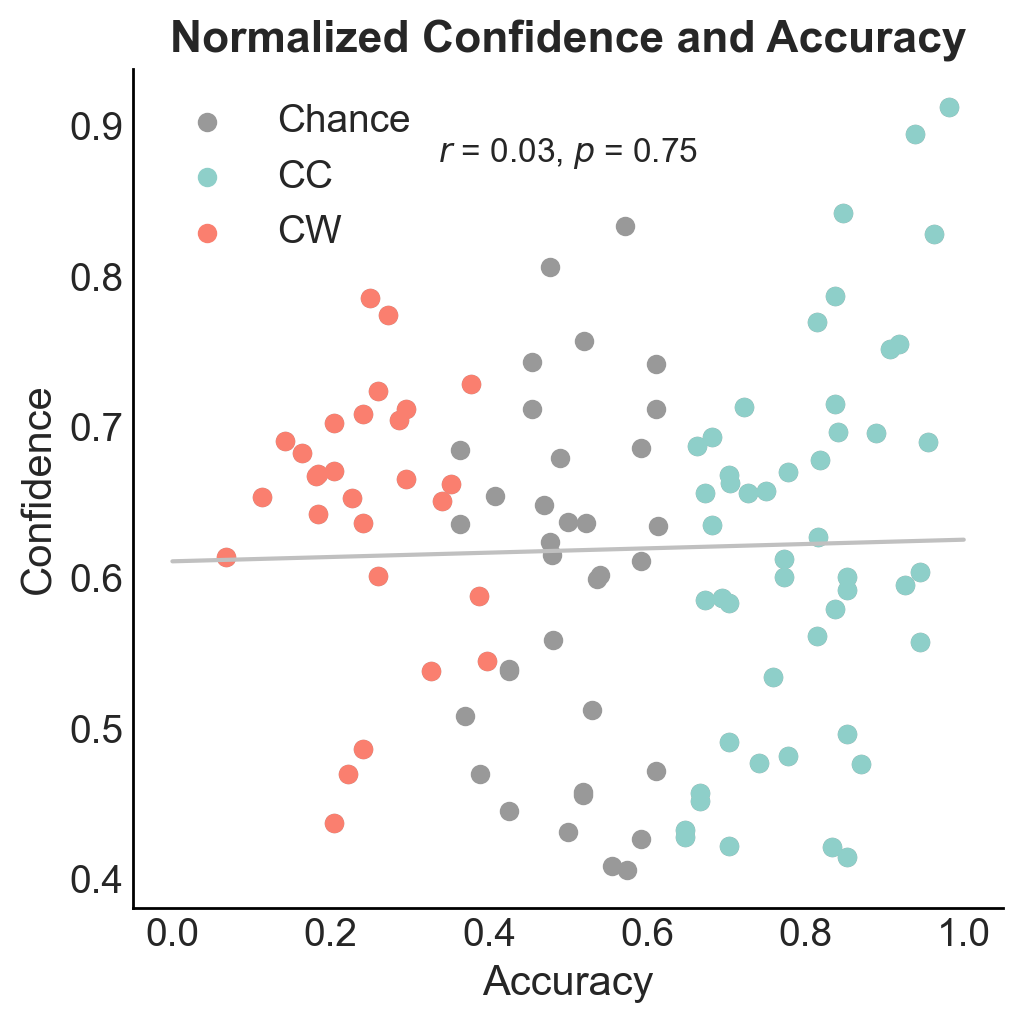

In [121]:
# Run Correlation
from scipy.stats import pearsonr
result = pearsonr(Norm_Combined['Q_Consen'], Norm_Combined['Q_Confi'])
print('(after normalization) The correlation between consensus and confidence is: {}, p-value is: {}'.format(result[0], result[1]))
result = pearsonr(CC_Norm_Ques_Consen_Confi_Correlation['Q_Consen'], CC_Norm_Ques_Consen_Confi_Correlation['Q_Confi'])
print('(after normalization) The correlation between consensus and confidence for CC questions is: {}, p-value is: {}'.format(result[0], result[1]))
result = pearsonr(CW_Norm_Ques_Consen_Confi_Correlation['Q_Consen'], CW_Norm_Ques_Consen_Confi_Correlation['Q_Confi'])
print('(after normalization) The correlation between consensus and confidence for CW questions is: {}, p-value is: {}'.format(result[0], result[1]))

# Draw the scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(Norm_Ques_Consen_Confi_Correlation['Q_Consen'], Norm_Ques_Consen_Confi_Correlation['Q_Confi'], color=ak, label='Chance')
plt.scatter(CC_Norm_Ques_Consen_Confi_Correlation['Q_Consen'], CC_Norm_Ques_Consen_Confi_Correlation['Q_Confi'], color=gr, label='CC')
plt.scatter(CW_Norm_Ques_Consen_Confi_Correlation['Q_Consen'], CW_Norm_Ques_Consen_Confi_Correlation['Q_Confi'], color=re, label='CW')
# Draw the regression line
plt.legend(loc='upper left')
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(Norm_Ques_Consen_Confi_Correlation['Q_Consen'], Norm_Ques_Consen_Confi_Correlation['Q_Confi'])
plt.plot([0,1], [intercept, intercept+slope], color= sil , label='Regression Line')
# write down the r and p value
plt.text(0.5, 0.9, '$r$ = {:.2f}, $p$ = {:.2f}'.format(r_value, p_value), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# plt.xlim([0.5,1])
plt.grid(False)
plt.xlabel('Accuracy')
plt.ylabel('Confidence')
plt.title('Normalized Confidence and Accuracy')

plt.show()


# 3 Maximum Confidence Slating Model

In this section, we test the MCS model for joint decision.

It predicts:
- The joint decision is made by the subject who is more confident in their choice;
- For CC questions, the joint decision accracy is higher than the individual decision accuracy;
- For CW questions, the joint decision accracy is lower than the individual decision accuracy.

We test this on the whole **Q_list, CC and CW** trials separately.

In [5]:
def Dummy_HC(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi):
    '''
    This function is used to simulate the joint decision based on MCS model for two subjects.
    AKA, generate the dummy subject's choice and confidence based on the choice with higher confidence.
    Input:
    subj_#_choice: the choice of subject #, 0 for wrong, 1 for right (for all questions)
    subj_#_confi: the confidence of subject #, range from 50 to 100
    
    Output:
    joint_choice: the joint decision of the two subjects, 0 for wrong, 1 for right (for all questions)
    joint_confi: the confidence of the joint decision, range from 50 to 100
    performance: if the joint decision accuarcy is lower than both, 0; if the joint decision accuarcy is higher than both, 1; if the joint decision accuarcy is higher than one but lower than the other, 0.5
    '''
    joint_choice = []
    joint_confi = []
    
    for i in range(len(subj_1_choice)):
        joint_confi.append(max(subj_1_confi[i], subj_2_confi[i]))
        if subj_1_choice[i] == subj_2_choice[i]:
            joint_choice.append(subj_1_choice[i])
        else:
            if subj_1_confi[i] > subj_2_confi[i]:
                joint_choice.append(subj_1_choice[i])
            elif subj_1_confi[i] < subj_2_confi[i]:
                joint_choice.append(subj_2_choice[i])
            else:
                joint_choice.append(np.random.choice([subj_1_choice[i], subj_2_choice[i]]))
    
    acc = np.mean(joint_choice)
    if acc <= np.min([np.mean(subj_1_choice), np.mean(subj_2_choice)]):
        performance = 0 
    elif acc >= np.max([np.mean(subj_1_choice), np.mean(subj_2_choice)]):
        performance = 1
    else:
        performance = 0.5
    
    return joint_choice, joint_confi, performance
                
def Dummy_LC(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi):
    '''
    Conditional control, generate the dummy subject's choice and confidence based on the choice with lower confidence.
    '''
    joint_choice = []
    joint_confi = []
    
    for i in range(len(subj_1_choice)):
        joint_confi.append(min(subj_1_confi[i], subj_2_confi[i]))
        if subj_1_choice[i] == subj_2_choice[i]:
            joint_choice.append(subj_1_choice[i])
        else:
            if subj_1_confi[i] < subj_2_confi[i]:
                joint_choice.append(subj_1_choice[i])
            elif subj_1_confi[i] > subj_2_confi[i]:
                joint_choice.append(subj_2_choice[i])
            else:
                joint_choice.append(np.random.choice([subj_1_choice[i], subj_2_choice[i]]))
    
    acc = np.mean(joint_choice)
    if acc <= np.min([np.mean(subj_1_choice), np.mean(subj_2_choice)]):
        performance = 0 
    elif acc >= np.max([np.mean(subj_1_choice), np.mean(subj_2_choice)]):
        performance = 1
    else:
        performance = 0.5
    
    return joint_choice, joint_confi, performance

def Dummy_random(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi):
    '''
    Conditional control2, generate the dummy subject's choice and confidence based on random choice from the two alternatives.
    '''
    joint_choice = []
    joint_confi = []
    
    for i in range(len(subj_1_choice)):
        random_idx = np.random.choice([0, 1])
        joint_confi.append([subj_1_confi[i], subj_2_confi[i]][random_idx])
        joint_choice.append([subj_1_choice[i], subj_2_choice[i]][random_idx])
    
    acc = np.mean(joint_choice)
    if acc <= np.min([np.mean(subj_1_choice), np.mean(subj_2_choice)]):
        performance = 0 
    elif acc >= np.max([np.mean(subj_1_choice), np.mean(subj_2_choice)]):
        performance = 1
    else:
        performance = 0.5
    
    return joint_choice, joint_confi, performance
    

## 3.1 Pairing by matching accuracy level

In the original paper, it is stated:
> The results were analyzed as in Study 3. One participant, with the highest percent correct, was deleted. The remaining 40 participants
formed **20 dyads by matching the members of each dyad as closely as possible on percent correct**.

To fully replicate the original paper, we also do the same pairing method.

Because we have 2 set of data and questions, CC and CW, we do the pairing separately for each set.

For each dyad, we can have 4 types of performance mearsurement:
- *HP*: High performing, the one with higher accuracy;
- *LP*: Low performing, the one with lower accuracy;
- *D-HC*: Dummy high-confidence, the results from MCS algorithmn, Dummy_HC;
- *D-LC*: Dummy low-confidence, the results from Dummy_LC;

Additionally, we can have a control group, where the decision is made randomly without confidence in consideration:
- *D-random*: Dummy random selection.

We run on each dyads these slating algorithm on all questions, CC questions and CW questions.

In [6]:
# the number of subjects in each group
subj_num_set_1 = all_data[all_data['set'] == 1]['SID'].unique()
print('The number of subjects in set 1 is: {}'.format(len(subj_num_set_1)))
subj_num_set_2 = all_data[all_data['set'] == 2]['SID'].unique()
print('The number of subjects in set 2 is: {}'.format(len(subj_num_set_2)))

The number of subjects in set 1 is: 54
The number of subjects in set 2 is: 44


In [7]:
def normalization(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

def standardization(x):
    return (x-np.mean(x))/np.std(x)

### 3.1.1 Pairing for Set 1

In [8]:
# Forming matching dyads based on the average accuracy
# rank the subjects based on their average accuracy
subj_acc_set_1 = {}
for iSub in subj_num_set_1:
    subj_acc_set_1[iSub] = np.mean(all_data[(all_data['SID'] == iSub)]['choice'])
subj_acc_set_1 = dict(sorted(subj_acc_set_1.items(), key=lambda item: item[1], reverse=True))
dyads_set_1 = []
for i in range(0, len(subj_acc_set_1), 2):
    dyads_set_1.append([list(subj_acc_set_1.keys())[i], list(subj_acc_set_1.keys())[i+1]])
print('The number of dyads in set 1 is: {}'.format(len(dyads_set_1)))


The number of dyads in set 1 is: 27


In [9]:
CW_idx_set_1

NameError: name 'CW_idx_set_1' is not defined

In [10]:
CW_idx 

array([  1,   4,   6,  21,  26,  27,  34,  35,  36,  37,  38,  46,  52,
        54,  67,  75,  77,  83,  87,  88,  89,  94,  97, 101, 102, 107,
       108, 109, 114, 115, 117, 119, 125, 127])

In [140]:
CC_idx

array([  0,   2,   8,  10,  11,  12,  13,  14,  19,  22,  24,  25,  30,
        32,  39,  41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  53,
        55,  56,  57,  59,  60,  61,  62,  66,  68,  70,  74,  78,  80,
        82,  86,  92,  93,  95,  99, 100, 103, 104, 105])

In [141]:
Chance_idx

array([  3,   5,   7,   9,  15,  16,  17,  18,  20,  23,  28,  29,  31,
        33,  40,  58,  63,  64,  65,  69,  71,  72,  73,  76,  79,  81,
        84,  85,  90,  91,  96,  98, 106, 110, 111])

In [194]:
# Locate types of questions for set 1
CC_idx_set_1 = [i for i in CC_idx+1 if i < 84]
CW_idx_set_1 = [i for i in CW_idx+1 if i < 84]
Chance_idx_set_1 = [i for i in Chance_idx+1 if i < 84]

# Construct how each participant answer each question in set 1
Subject = pd.DataFrame({'Subj': subj_num_set_1})
All_Response_set_1 = pd.DataFrame(columns=['Q_{}'.format(i) for i in range(1, 83+1)], index=[0])
All_Confi_set_1 = pd.DataFrame(columns=['Q_{}'.format(i) for i in range(1, 83+1)], index=[0])
All_Response_set_1 = pd.concat([Subject, All_Response_set_1], axis=1)
All_Confi_set_1 = pd.concat([Subject, All_Confi_set_1], axis=1)
for iSub in subj_num_set_1:
    Subj_Response = all_data[(all_data['SID'] == iSub) & (all_data['set'] == 1)]['choice'].values
    Subj_Confi = all_data[(all_data['SID'] == iSub) & (all_data['set'] == 1)]['confidence'].values
    # Subj_Confi = normalization(Subj_Confi)
    All_Response_set_1.loc[All_Response_set_1['Subj'] == iSub, ['Q_{}'.format(i) for i in range(1, 83+1)]] = Subj_Response
    All_Confi_set_1.loc[All_Confi_set_1['Subj'] == iSub, ['Q_{}'.format(i) for i in range(1, 83+1)]] = Subj_Confi

# find CC, CW and Chance question
CC_Response_set_1 = All_Response_set_1.loc[:, ['Q_{}'.format(i) for i in CC_idx_set_1]]
CC_Response_set_1 = pd.concat([Subject, CC_Response_set_1], axis=1)
CC_Confi_set_1 = All_Confi_set_1.loc[:, ['Q_{}'.format(i) for i in CC_idx_set_1]]
CC_Confi_set_1 = pd.concat([Subject, CC_Confi_set_1], axis=1)
CW_Response_set_1 = All_Response_set_1.loc[:, ['Q_{}'.format(i) for i in CW_idx_set_1]]
CW_Response_set_1 = pd.concat([Subject, CW_Response_set_1], axis=1)
CW_Confi_set_1 = All_Confi_set_1.loc[:, ['Q_{}'.format(i) for i in CW_idx_set_1]]
CW_Confi_set_1 = pd.concat([Subject, CW_Confi_set_1], axis=1)
Chance_Response_set_1 = All_Response_set_1.loc[:, ['Q_{}'.format(i) for i in Chance_idx_set_1]]
Chance_Confi_set_1 = All_Confi_set_1.loc[:, ['Q_{}'.format(i) for i in Chance_idx_set_1]]

In [201]:
# Template for all the dyads
Dyad_template = pd.DataFrame(columns=['Dyad','Subj_1', 'Subj_2', 'HC', 'LC', 'D-HC', 'D-LC', 'D-Random'])
rep_times = 5;

# Generate the dummy data for each dyad
types = ['All', 'CC', 'CW']
datas = [All_Response_set_1, CC_Response_set_1, CW_Response_set_1]
datas_confi = [All_Confi_set_1, CC_Confi_set_1, CW_Confi_set_1]
all_dyads = {}

for iQ in range(len(datas)):
    data = datas[iQ]
    data_confi = datas_confi[iQ]
    Dyads_data = Dyad_template.copy()
    key = types[iQ]
    for iDyad in range(len(dyads_set_1)):
        subj_1, subj_2 = int(dyads_set_1[iDyad][0]), int(dyads_set_1[iDyad][1])
        subj_1_choice = list(data[data['Subj'] == subj_1].iloc[:, 1:].values[0])
        subj_1_confi = list(data_confi[data_confi['Subj'] == subj_1].iloc[:, 1:].values[0])
        subj_2_choice = list(data[data['Subj'] == subj_2].iloc[:, 1:].values[0])
        subj_2_confi = list(data_confi[data_confi['Subj'] == subj_2].iloc[:, 1:].values[0])
        hc_i = max(np.mean(subj_1_choice), np.mean(subj_2_choice))
        lc_i = min(np.mean(subj_1_choice), np.mean(subj_2_choice))
        dhc_i = np.mean(Dummy_HC(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0])
        dlc_i = np.mean(Dummy_LC(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0])
        d_rds = []
        for iR in range(rep_times):
            d_rds.append(np.mean(Dummy_random(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0]))
        dr_i = np.mean(d_rds)
        Dyad_i = pd.DataFrame([[iDyad, subj_1, subj_2, hc_i, lc_i, dhc_i, dlc_i, dr_i]], columns=['Dyad','Subj_1', 'Subj_2', 'HC', 'LC', 'D-HC', 'D-LC', 'D-Random'])
        Dyads_data = pd.concat([Dyads_data, Dyad_i], axis=0)
    all_dyads[key] = Dyads_data

In [151]:
from scipy import stats
from scipy.stats import binomtest

print('Dyad data for all questions:')
print('Mean HC: {} +/- {}'.format(np.mean(all_dyads['All']['HC']), np.std(all_dyads['All']['HC'])))
print('Mean LC: {} +/- {}'.format(np.mean(all_dyads['All']['LC']), np.std(all_dyads['All']['LC'])))
print('Mean D-HC: {} +/- {}'.format(np.mean(all_dyads['All']['D-HC']), np.std(all_dyads['All']['D-HC'])))
print('Mean D-LC: {} +/- {}'.format(np.mean(all_dyads['All']['D-LC']), np.std(all_dyads['All']['D-LC'])))
print('Mean D-Random: {} +/- {}'.format(np.mean(all_dyads['All']['D-Random']), np.std(all_dyads['All']['D-Random'])))
print('D-HC higher than HC, t-test: {}'.format(stats.ttest_rel(all_dyads['All']['D-HC'], all_dyads['All']['HC'])))
print('D-HC higher than D-LC, t-test: {}'.format(stats.ttest_rel(all_dyads['All']['D-HC'], all_dyads['All']['D-LC'])))
print('D-HC better than HC: {} out of {}'.format(np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['HC']), len(all_dyads['All'])))
print('Binomial test: {}'.format(binomtest(np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['HC']), len(all_dyads['All']))))
print()

print('Dyad data for CC questions:')
print('Mean HC: {} +/- {}'.format(np.mean(all_dyads['CC']['HC']), np.std(all_dyads['CC']['HC'])))
print('Mean LC: {} +/- {}'.format(np.mean(all_dyads['CC']['LC']), np.std(all_dyads['CC']['LC'])))
print('Mean D-HC: {} +/- {}'.format(np.mean(all_dyads['CC']['D-HC']), np.std(all_dyads['CC']['D-HC'])))
print('Mean D-LC: {} +/- {}'.format(np.mean(all_dyads['CC']['D-LC']), np.std(all_dyads['CC']['D-LC'])))
print('Mean D-Random: {} +/- {}'.format(np.mean(all_dyads['CC']['D-Random']), np.std(all_dyads['CC']['D-Random'])))
print('D-HC higher than HC, t-test: {}'.format(stats.ttest_rel(all_dyads['CC']['D-HC'], all_dyads['CC']['HC'])))
print('D-HC higher than D-LC, t-test: {}'.format(stats.ttest_rel(all_dyads['CC']['D-HC'], all_dyads['CC']['D-LC'])))
print('D-HC better than HC: {} out of {}'.format(np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['HC']), len(all_dyads['CC'])))
print('Binomial test: {}'.format(binomtest(np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['HC']), len(all_dyads['CC']))))
print()

print('Dyad data for CW questions:')
print('Mean HC: {} +/- {}'.format(np.mean(all_dyads['CW']['HC']), np.std(all_dyads['CW']['HC'])))
print('Mean LC: {} +/- {}'.format(np.mean(all_dyads['CW']['LC']), np.std(all_dyads['CW']['LC'])))
print('Mean D-HC: {} +/- {}'.format(np.mean(all_dyads['CW']['D-HC']), np.std(all_dyads['CW']['D-HC'])))
print('Mean D-LC: {} +/- {}'.format(np.mean(all_dyads['CW']['D-LC']), np.std(all_dyads['CW']['D-LC'])))
print('Mean D-Random: {} +/- {}'.format(np.mean(all_dyads['CW']['D-Random']), np.std(all_dyads['CW']['D-Random'])))
print('D-HC higher than HC, t-test: {}'.format(stats.ttest_rel(all_dyads['CW']['D-HC'], all_dyads['CW']['HC'])))
print('D-HC higher than D-LC, t-test: {}'.format(stats.ttest_rel(all_dyads['CW']['D-HC'], all_dyads['CW']['D-LC'])))
print('D-HC btter than HC: {} out of {}'.format(np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['HC']), len(all_dyads['CW'])))
print('Binomial test: {}'.format(binomtest(np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['HC']), len(all_dyads['CW']))))
print()


Dyad data for all questions:
Mean HC: 0.6131191432396251 +/- 0.057392104712787176
Mean LC: 0.608210620258813 +/- 0.05519913120266916
Mean D-HC: 0.6305220883534138 +/- 0.06028557027682838
Mean D-LC: 0.5890227576974565 +/- 0.06833868282784587
Mean D-Random: 0.6120481927710844 +/- 0.06192210233711378
D-HC higher than HC, t-test: TtestResult(statistic=2.8011477239568374, pvalue=0.009483241429173244, df=26)
D-HC higher than D-LC, t-test: TtestResult(statistic=3.6055512754639896, pvalue=0.0012960268618098956, df=26)
D-HC better than HC: 16 out of 27
Binomial test: BinomTestResult(k=16, n=27, alternative='two-sided', statistic=0.5925925925925926, pvalue=0.44206833839416504)

Dyad data for CC questions:
Mean HC: 0.850925925925926 +/- 0.06066051612651555
Mean LC: 0.7870370370370368 +/- 0.07339970808372745
Mean D-HC: 0.8555555555555555 +/- 0.06098471777805596
Mean D-LC: 0.7861111111111112 +/- 0.09137157890776959
Mean D-Random: 0.8174074074074075 +/- 0.06600182896414158
D-HC higher than HC, t-tes

In [37]:
# Make an out put table for the dyad data for all questions
Dyads_output = pd.DataFrame(columns=['Q_type', 'Mean_HC', 'Std_HC', 'Mean_LC', 'Std_LC', 'Mean_D-HC', 'Std_D-HC', 'Mean_D-LC', 'Std_D-LC', 'Mean_D-Random', 'Std_D-Random', '# D-HC > HC', '# D-HC > D-LC', '# D-HC better than HC', 'Binomial test'])
Dyads_All_Question = pd.DataFrame([[types[0], np.mean(all_dyads['All']['HC']), np.std(all_dyads['All']['HC']), np.mean(all_dyads['All']['LC']), np.std(all_dyads['All']['LC']), np.mean(all_dyads['All']['D-HC']), np.std(all_dyads['All']['D-HC']), np.mean(all_dyads['All']['D-LC']), np.std(all_dyads['All']['D-LC']), np.mean(all_dyads['All']['D-Random']), np.std(all_dyads['All']['D-Random']), np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['HC']), np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['D-LC']), np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['HC']), binomtest(np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['HC']), len(all_dyads['All']))]], columns=['Q_type', 'Mean_HC', 'Std_HC', 'Mean_LC', 'Std_LC', 'Mean_D-HC', 'Std_D-HC', 'Mean_D-LC', 'Std_D-LC', 'Mean_D-Random', 'Std_D-Random', '# D-HC > HC', '# D-HC > D-LC', '# D-HC better than HC', 'Binomial test'])
Dyads_CC_Question = pd.DataFrame([[types[1], np.mean(all_dyads['CC']['HC']), np.std(all_dyads['CC']['HC']), np.mean(all_dyads['CC']['LC']), np.std(all_dyads['CC']['LC']), np.mean(all_dyads['CC']['D-HC']), np.std(all_dyads['CC']['D-HC']), np.mean(all_dyads['CC']['D-LC']), np.std(all_dyads['CC']['D-LC']), np.mean(all_dyads['CC']['D-Random']), np.std(all_dyads['CC']['D-Random']), np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['HC']), np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['D-LC']), np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['HC']), binomtest(np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['HC']), len(all_dyads['CC']))]], columns=['Q_type', 'Mean_HC', 'Std_HC', 'Mean_LC', 'Std_LC', 'Mean_D-HC', 'Std_D-HC', 'Mean_D-LC', 'Std_D-LC', 'Mean_D-Random', 'Std_D-Random', '# D-HC > HC', '# D-HC > D-LC', '# D-HC better than HC', 'Binomial test'])
Dyads_CW_Question = pd.DataFrame([[types[2], np.mean(all_dyads['CW']['HC']), np.std(all_dyads['CW']['HC']), np.mean(all_dyads['CW']['LC']), np.std(all_dyads['CW']['LC']), np.mean(all_dyads['CW']['D-HC']), np.std(all_dyads['CW']['D-HC']), np.mean(all_dyads['CW']['D-LC']), np.std(all_dyads['CW']['D-LC']), np.mean(all_dyads['CW']['D-Random']), np.std(all_dyads['CW']['D-Random']), np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['HC']), np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['D-LC']), np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['HC']), binomtest(np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['HC']), len(all_dyads['CW']))]], columns=['Q_type', 'Mean_HC', 'Std_HC', 'Mean_LC', 'Std_LC', 'Mean_D-HC', 'Std_D-HC', 'Mean_D-LC', 'Std_D-LC', 'Mean_D-Random', 'Std_D-Random', '# D-HC > HC', '# D-HC > D-LC', '# D-HC better than HC', 'Binomial test'])
Dyads_output = pd.concat([Dyads_output, Dyads_All_Question, Dyads_CC_Question, Dyads_CW_Question], axis=0)
Dyads_output_Trans = Dyads_output.T
Dyads_output_Trans.to_excel('Dyads_output_set_1.xlsx')

### 3.1.2 Pairing for Set 2

In [196]:
# Forming matching dyads based on the average accuracy
# rank the subjects based on their average accuracy
subj_acc = {}
for iSub in subj_num_set_2:
    subj_acc[iSub] = np.mean(all_data[(all_data['SID'] == iSub)]['choice'])
subj_acc = dict(sorted(subj_acc.items(), key=lambda item: item[1], reverse=True))
dyads_set_2 = []
for i in range(0, len(subj_acc), 2):
    dyads_set_2.append([list(subj_acc.keys())[i], list(subj_acc.keys())[i+1]])
print('The number of dyads in set 2 is: {}'.format(len(dyads_set_2)))

subj_acc_set_2 = subj_acc

The number of dyads in set 2 is: 22


In [199]:
# Locate types of questions for set 1
Q_set_2_idx = all_data[all_data['set'] == 2]['question'].unique()
CC_idx_set_2 = [i for i in CC_idx+1 if i in Q_set_2_idx]
CW_idx_set_2 = [i for i in CW_idx+1 if i in Q_set_2_idx]
Chance_idx_set_2 = [i for i in Chance_idx+1 if i in Q_set_2_idx]

# Construct how each participant answer each question in set 1
Subject = pd.DataFrame({'Subj': subj_num_set_2})
All_Response_set_2 = pd.DataFrame(columns=['Q_{}'.format(i) for i in Q_set_2_idx], index=[0])
All_Confi_set_2 = pd.DataFrame(columns=['Q_{}'.format(i) for i in Q_set_2_idx], index=[0])
All_Response_set_2 = pd.concat([Subject, All_Response_set_2], axis=1)
All_Confi_set_2 = pd.concat([Subject, All_Confi_set_2], axis=1)
for iSub in subj_num_set_2:
    Subj_Response = all_data[(all_data['SID'] == iSub) & (all_data['set'] == 2) & (all_data['question'].isin(Q_set_2_idx))]['choice'].values
    Subj_Confi = all_data[(all_data['SID'] == iSub) & (all_data['set'] == 2) & (all_data['question'].isin(Q_set_2_idx))]['confidence'].values
    if np.isnan(Subj_Response).any():
        Subj_Response = np.nan_to_num(Subj_Response)
    if np.isnan(Subj_Confi).any():
        Subj_Confi = np.where(np.isnan(Subj_Confi), np.mean(Subj_Confi[~np.isnan(Subj_Confi)]), Subj_Confi)
    Subj_Confi = normalization(Subj_Confi)
    All_Response_set_2.loc[All_Response_set_2['Subj'] == iSub, ['Q_{}'.format(i) for i in Q_set_2_idx]] = Subj_Response
    All_Confi_set_2.loc[All_Confi_set_2['Subj'] == iSub, ['Q_{}'.format(i) for i in Q_set_2_idx]] = Subj_Confi

# find CC, CW and Chance question
CC_Response_set_2 = All_Response_set_2.loc[:, ['Q_{}'.format(i) for i in CC_idx_set_2]]
CC_Response_set_2 = pd.concat([Subject, CC_Response_set_2], axis=1)
CC_Confi_set_2 = All_Confi_set_2.loc[:, ['Q_{}'.format(i) for i in CC_idx_set_2]]
CC_Confi_set_2 = pd.concat([Subject, CC_Confi_set_2], axis=1)
CW_Response_set_2 = All_Response_set_2.loc[:, ['Q_{}'.format(i) for i in CW_idx_set_2]]
CW_Response_set_2 = pd.concat([Subject, CW_Response_set_2], axis=1)
CW_Confi_set_2 = All_Confi_set_2.loc[:, ['Q_{}'.format(i) for i in CW_idx_set_2]]
CW_Confi_set_2 = pd.concat([Subject, CW_Confi_set_2], axis=1)
Chance_Response_set_2 = All_Response_set_2.loc[:, ['Q_{}'.format(i) for i in Chance_idx_set_2]]
Chance_Confi_set_2 = All_Confi_set_2.loc[:, ['Q_{}'.format(i) for i in Chance_idx_set_2]]

In [200]:
# Template for all the dyads
Dyad_template = pd.DataFrame(columns=['Dyad','Subj_1', 'Subj_2', 'HC', 'LC', 'D-HC', 'D-LC', 'D-Random'])
rep_times = 5;

# Generate the dummy data for each dyad
types = ['All', 'CC', 'CW']
datas = [All_Response_set_2, CC_Response_set_2, CW_Response_set_2]
datas_confi = [All_Confi_set_2, CC_Confi_set_2, CW_Confi_set_2]
set_2_all_dyads = {}

for iQ in range(len(datas)):
    data = datas[iQ]
    data_confi = datas_confi[iQ]
    Dyads_data = Dyad_template.copy()
    key = types[iQ]
    for iDyad in range(len(dyads_set_2)):
        subj_1, subj_2 = int(dyads_set_2[iDyad][0]), int(dyads_set_2[iDyad][1])
        subj_1_choice = list(data[data['Subj'] == subj_1].iloc[:, 1:].values[0])
        subj_1_confi = list(data_confi[data_confi['Subj'] == subj_1].iloc[:, 1:].values[0])
        subj_2_choice = list(data[data['Subj'] == subj_2].iloc[:, 1:].values[0])
        subj_2_confi = list(data_confi[data_confi['Subj'] == subj_2].iloc[:, 1:].values[0])
        hc_i = max(np.mean(subj_1_choice), np.mean(subj_2_choice))
        lc_i = min(np.mean(subj_1_choice), np.mean(subj_2_choice))
        dhc_i = np.mean(Dummy_HC(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0])
        dlc_i = np.mean(Dummy_LC(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0])
        d_rds = []
        for iR in range(rep_times):
            d_rds.append(np.mean(Dummy_random(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0]))
        dr_i = np.mean(d_rds)
        Dyad_i = pd.DataFrame([[iDyad, subj_1, subj_2, hc_i, lc_i, dhc_i, dlc_i, dr_i]], columns=['Dyad','Subj_1', 'Subj_2', 'HC', 'LC', 'D-HC', 'D-LC', 'D-Random'])
        Dyads_data = pd.concat([Dyads_data, Dyad_i], axis=0)
    set_2_all_dyads[key] = Dyads_data

In [171]:
from scipy import stats
from scipy.stats import binomtest
all_dyads = set_2_all_dyads
print('Dyad data for all questions:')
print('Mean HC: {} +/- {}'.format(np.mean(all_dyads['All']['HC']), np.std(all_dyads['All']['HC'])))
print('Mean LC: {} +/- {}'.format(np.mean(all_dyads['All']['LC']), np.std(all_dyads['All']['LC'])))
print('Mean D-HC: {} +/- {}'.format(np.mean(all_dyads['All']['D-HC']), np.std(all_dyads['All']['D-HC'])))
print('Mean D-LC: {} +/- {}'.format(np.mean(all_dyads['All']['D-LC']), np.std(all_dyads['All']['D-LC'])))
print('Mean D-Random: {} +/- {}'.format(np.mean(all_dyads['All']['D-Random']), np.std(all_dyads['All']['D-Random'])))
print('D-HC higher than HC, t-test: {}'.format(stats.ttest_rel(all_dyads['All']['D-HC'], all_dyads['All']['HC'])))
print('D-HC higher than D-LC, t-test: {}'.format(stats.ttest_rel(all_dyads['All']['D-HC'], all_dyads['All']['D-LC'])))
print('D-HC better than HC: {} out of {}'.format(np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['HC']), len(all_dyads['All'])))
print('Binomial test: {}'.format(binomtest(np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['HC']), len(all_dyads['All']))))
print()

print('Dyad data for CC questions:')
print('Mean HC: {} +/- {}'.format(np.mean(all_dyads['CC']['HC']), np.std(all_dyads['CC']['HC'])))
print('Mean LC: {} +/- {}'.format(np.mean(all_dyads['CC']['LC']), np.std(all_dyads['CC']['LC'])))
print('Mean D-HC: {} +/- {}'.format(np.mean(all_dyads['CC']['D-HC']), np.std(all_dyads['CC']['D-HC'])))
print('Mean D-LC: {} +/- {}'.format(np.mean(all_dyads['CC']['D-LC']), np.std(all_dyads['CC']['D-LC'])))
print('Mean D-Random: {} +/- {}'.format(np.mean(all_dyads['CC']['D-Random']), np.std(all_dyads['CC']['D-Random'])))
print('D-HC higher than HC, t-test: {}'.format(stats.ttest_rel(all_dyads['CC']['D-HC'], all_dyads['CC']['HC'])))
print('D-HC higher than D-LC, t-test: {}'.format(stats.ttest_rel(all_dyads['CC']['D-HC'], all_dyads['CC']['D-LC'])))
print('D-HC better than HC: {} out of {}'.format(np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['HC']), len(all_dyads['CC'])))
print('Binomial test: {}'.format(binomtest(np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['HC']), len(all_dyads['CC']))))
print()

print('Dyad data for CW questions:')
print('Mean HC: {} +/- {}'.format(np.mean(all_dyads['CW']['HC']), np.std(all_dyads['CW']['HC'])))
print('Mean LC: {} +/- {}'.format(np.mean(all_dyads['CW']['LC']), np.std(all_dyads['CW']['LC'])))
print('Mean D-HC: {} +/- {}'.format(np.mean(all_dyads['CW']['D-HC']), np.std(all_dyads['CW']['D-HC'])))
print('Mean D-LC: {} +/- {}'.format(np.mean(all_dyads['CW']['D-LC']), np.std(all_dyads['CW']['D-LC'])))
print('Mean D-Random: {} +/- {}'.format(np.mean(all_dyads['CW']['D-Random']), np.std(all_dyads['CW']['D-Random'])))
print('D-HC higher than HC, t-test: {}'.format(stats.ttest_rel(all_dyads['CW']['D-HC'], all_dyads['CW']['HC'])))
print('D-HC higher than D-LC, t-test: {}'.format(stats.ttest_rel(all_dyads['CW']['D-HC'], all_dyads['CW']['D-LC'])))
print('D-HC btter than HC: {} out of {}'.format(np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['HC']), len(all_dyads['CW'])))
print('Binomial test: {}'.format(binomtest(np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['HC']), len(all_dyads['CW']))))
print()


Dyad data for all questions:
Mean HC: 0.4666283084004604 +/- 0.05195279882673107
Mean LC: 0.46029919447640977 +/- 0.04910607202152329
Mean D-HC: 0.47410817031070207 +/- 0.05527185251333868
Mean D-LC: 0.45454545454545464 +/- 0.06200172056627938
Mean D-Random: 0.461680092059839 +/- 0.049783118820426395
D-HC higher than HC, t-test: TtestResult(statistic=1.0684215488198587, pvalue=0.2974588273996384, df=21)
D-HC higher than D-LC, t-test: TtestResult(statistic=1.4519034469661747, pvalue=0.16130586100043223, df=21)
D-HC better than HC: 11 out of 22
Binomial test: BinomTestResult(k=11, n=22, alternative='two-sided', statistic=0.5, pvalue=1.0)

Dyad data for CC questions:
Mean HC: 0.7406417112299465 +/- 0.11169304050377228
Mean LC: 0.6096256684491979 +/- 0.13218403309420615
Mean D-HC: 0.6978609625668448 +/- 0.1219732056465994
Mean D-LC: 0.6550802139037433 +/- 0.13425016268056889
Mean D-Random: 0.6770053475935828 +/- 0.10155923572395512
D-HC higher than HC, t-test: TtestResult(statistic=-3.0444

In [172]:
# Make an out put table for the dyad data for all questions
Dyads_output = pd.DataFrame(columns=['Q_type', 'Mean_HC', 'Std_HC', 'Mean_LC', 'Std_LC', 'Mean_D-HC', 'Std_D-HC', 'Mean_D-LC', 'Std_D-LC', 'Mean_D-Random', 'Std_D-Random', '# D-HC > HC', '# D-HC > D-LC', '# D-HC better than HC', 'Binomial test'])
Dyads_All_Question = pd.DataFrame([[types[0], np.mean(all_dyads['All']['HC']), np.std(all_dyads['All']['HC']), np.mean(all_dyads['All']['LC']), np.std(all_dyads['All']['LC']), np.mean(all_dyads['All']['D-HC']), np.std(all_dyads['All']['D-HC']), np.mean(all_dyads['All']['D-LC']), np.std(all_dyads['All']['D-LC']), np.mean(all_dyads['All']['D-Random']), np.std(all_dyads['All']['D-Random']), np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['HC']), np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['D-LC']), np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['HC']), binomtest(np.sum(all_dyads['All']['D-HC'] > all_dyads['All']['HC']), len(all_dyads['All']))]], columns=['Q_type', 'Mean_HC', 'Std_HC', 'Mean_LC', 'Std_LC', 'Mean_D-HC', 'Std_D-HC', 'Mean_D-LC', 'Std_D-LC', 'Mean_D-Random', 'Std_D-Random', '# D-HC > HC', '# D-HC > D-LC', '# D-HC better than HC', 'Binomial test'])
Dyads_CC_Question = pd.DataFrame([[types[1], np.mean(all_dyads['CC']['HC']), np.std(all_dyads['CC']['HC']), np.mean(all_dyads['CC']['LC']), np.std(all_dyads['CC']['LC']), np.mean(all_dyads['CC']['D-HC']), np.std(all_dyads['CC']['D-HC']), np.mean(all_dyads['CC']['D-LC']), np.std(all_dyads['CC']['D-LC']), np.mean(all_dyads['CC']['D-Random']), np.std(all_dyads['CC']['D-Random']), np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['HC']), np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['D-LC']), np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['HC']), binomtest(np.sum(all_dyads['CC']['D-HC'] > all_dyads['CC']['HC']), len(all_dyads['CC']))]], columns=['Q_type', 'Mean_HC', 'Std_HC', 'Mean_LC', 'Std_LC', 'Mean_D-HC', 'Std_D-HC', 'Mean_D-LC', 'Std_D-LC', 'Mean_D-Random', 'Std_D-Random', '# D-HC > HC', '# D-HC > D-LC', '# D-HC better than HC', 'Binomial test'])
Dyads_CW_Question = pd.DataFrame([[types[2], np.mean(all_dyads['CW']['HC']), np.std(all_dyads['CW']['HC']), np.mean(all_dyads['CW']['LC']), np.std(all_dyads['CW']['LC']), np.mean(all_dyads['CW']['D-HC']), np.std(all_dyads['CW']['D-HC']), np.mean(all_dyads['CW']['D-LC']), np.std(all_dyads['CW']['D-LC']), np.mean(all_dyads['CW']['D-Random']), np.std(all_dyads['CW']['D-Random']), np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['HC']), np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['D-LC']), np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['HC']), binomtest(np.sum(all_dyads['CW']['D-HC'] > all_dyads['CW']['HC']), len(all_dyads['CW']))]], columns=['Q_type', 'Mean_HC', 'Std_HC', 'Mean_LC', 'Std_LC', 'Mean_D-HC', 'Std_D-HC', 'Mean_D-LC', 'Std_D-LC', 'Mean_D-Random', 'Std_D-Random', '# D-HC > HC', '# D-HC > D-LC', '# D-HC better than HC', 'Binomial test'])
Dyads_output = pd.concat([Dyads_output, Dyads_All_Question, Dyads_CC_Question, Dyads_CW_Question], axis=0)
# Dyads_output_Trans = Dyads_output.T
# Dyads_output_Trans.to_csv('Norm_Dyads_output_set_2.csv', index=False, header=False)
Dyads_output.to_excel('Dyads_output_set_2.xlsx')

In [202]:
# Combine the dyad data from set 1 and set 2

all_dyads_combined = pd.DataFrame(columns=['Dyad','HC', 'LC', 'D-HC', 'D-LC', 'D-Random', 'Q_type', 'Set'])
dyads_1_2 = [all_dyads, set_2_all_dyads]
for iset in range(1,3):
    for iQ in range(len(types)):
        key = types[iQ]
        dyad_data = dyads_1_2[iset-1][key]
        for iDyad in range(len(dyad_data)):
            dyad_i_data = dyad_data.iloc[iDyad, 3:].values
            all_dyads_combined = pd.concat([all_dyads_combined, pd.DataFrame([[iDyad, dyad_i_data[0], dyad_i_data[1], dyad_i_data[2], dyad_i_data[3], dyad_i_data[4], key, iset]], columns=['Dyad','HC', 'LC', 'D-HC', 'D-LC', 'D-Random', 'Q_type', 'Set'])], axis=0)
        

In [206]:
all_dyads_combined_All = all_dyads_combined[all_dyads_combined['Q_type'] == 'All']
all_dyads_combined_CC = all_dyads_combined[all_dyads_combined['Q_type'] == 'CC']
all_dyads_combined_CW = all_dyads_combined[all_dyads_combined['Q_type'] == 'CW']
print('Dyad data for all questions:')
# paired t-test on D-HC and HC combing the set 1 and set 2
print('Paired t-test on D-HC and HC:')
print('All questions: {}'.format(stats.ttest_rel(all_dyads_combined_All['D-HC'], all_dyads_combined_All['HC'])))
print('CC questions: {}'.format(stats.ttest_rel(all_dyads_combined_CC['D-HC'], all_dyads_combined_CC['HC'])))
print('CW questions: {}'.format(stats.ttest_rel(all_dyads_combined_CW['D-HC'], all_dyads_combined_CW['HC'])))
# paired t-test on D-HC and D-LC combing the set 1 and set 2
print('Paired t-test on D-HC and D-LC:')
print('All questions: {}'.format(stats.ttest_rel(all_dyads_combined_All['D-HC'], all_dyads_combined_All['D-LC'])))
print('CC questions: {}'.format(stats.ttest_rel(all_dyads_combined_CC['D-HC'], all_dyads_combined_CC['D-LC'])))
print('CW questions: {}'.format(stats.ttest_rel(all_dyads_combined_CW['D-HC'], all_dyads_combined_CW['D-LC'])))


Dyad data for all questions:
Paired t-test on D-HC and HC:
All questions: TtestResult(statistic=2.276146156193511, pvalue=0.02733820779054736, df=48)
CC questions: TtestResult(statistic=-1.913460399577042, pvalue=0.06166329015116408, df=48)
CW questions: TtestResult(statistic=-6.936963982274063, pvalue=9.185726879068227e-09, df=48)
Paired t-test on D-HC and D-LC:
All questions: TtestResult(statistic=3.0447823052902714, pvalue=0.003773533928635289, df=48)
CC questions: TtestResult(statistic=3.2806003013655016, pvalue=0.0019336342531728837, df=48)
CW questions: TtestResult(statistic=-1.9224056341654205, pvalue=0.06050024070070652, df=48)


In [208]:
0.012920 * 2


0.02584

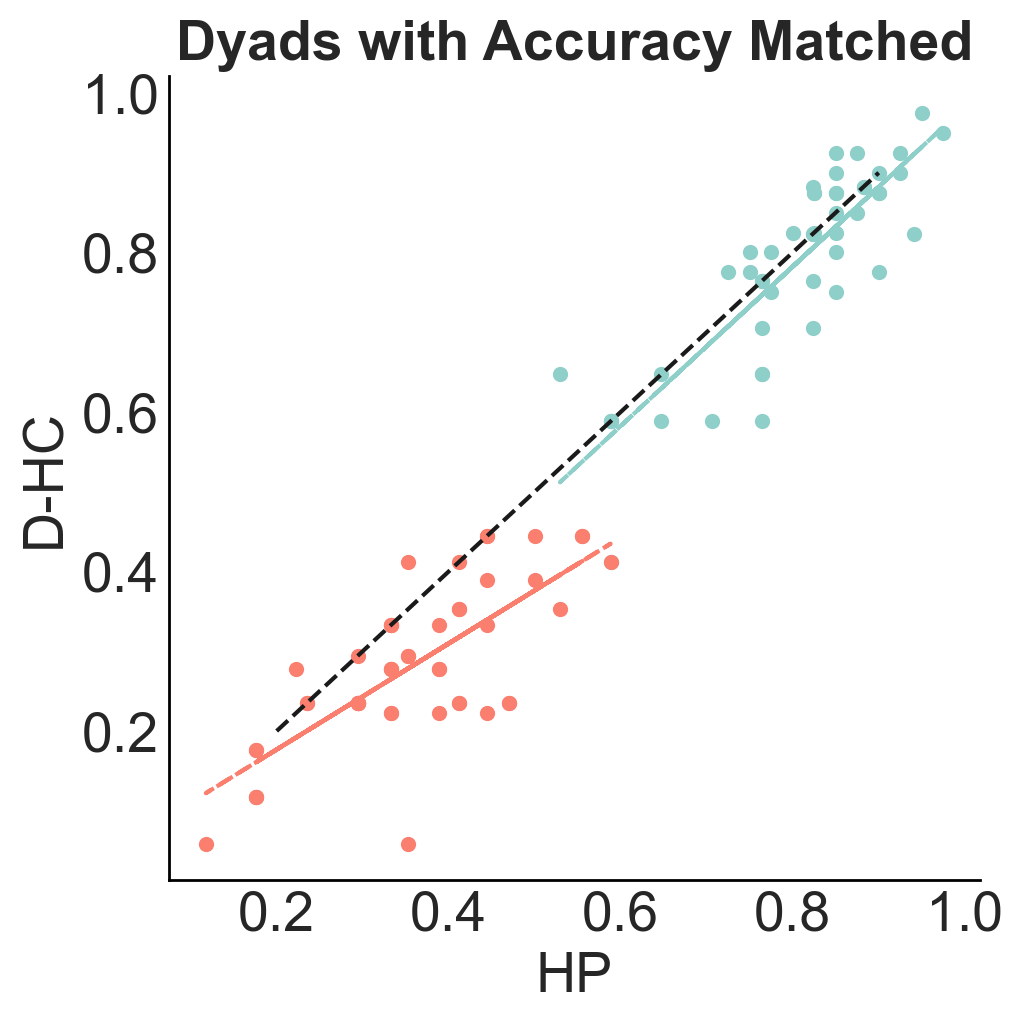

In [203]:
# Draw Scatter plot for the dyad data HC and D-HC and Draw the regression line
plt.figure(figsize=(5,5))
all_CC = all_dyads_combined[all_dyads_combined['Q_type'] == 'CC']
all_CW = all_dyads_combined[all_dyads_combined['Q_type'] == 'CW']


# plt.scatter(all_dyads_combined['HC'], all_dyads_combined['D-HC'], color=ak, s=10)
plt.scatter(all_CC['HC'], all_CC['D-HC'], color=gr, s=20)
plt.scatter(all_CW['HC'], all_CW['D-HC'], color=re, s=20)
# regression line
# CC
x = all_CC['HC'].values
y = all_CC['D-HC'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, intercept + slope*x, color=gr, linestyle='--')
# CW
x = all_CW['HC'].values
y = all_CW['D-HC'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, intercept + slope*x, color=re, linestyle='--')
plt.plot([0.2, 0.9], [0.2, 0.9], color='k', linestyle='--')
plt.title('Dyads with Accuracy Matched', fontsize=20)
plt.xlabel('HP', fontsize=20)
plt.ylabel('D-HC', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()



In [179]:
# Run for all possible dyads
# Forming all possible dyads
# set_1
all_possible_dyads_set_1 = []
for i in range(len(subj_num_set_1)):
    for j in range(i+1, len(subj_num_set_1)):
        if i != j:
            all_possible_dyads_set_1.append([subj_num_set_1[i], subj_num_set_1[j]])
print('The number of all possible dyads in set 1 is: {}'.format(len(all_possible_dyads_set_1)))

# set_2
all_possible_dyads_set_2 = []
for i in range(len(subj_num_set_2)):
    for j in range(i+1, len(subj_num_set_2)):
        if i != j:
            all_possible_dyads_set_2.append([subj_num_set_2[i], subj_num_set_2[j]])
print('The number of all possible dyads in set 2 is: {}'.format(len(all_possible_dyads_set_2)))

The number of all possible dyads in set 1 is: 1431
The number of all possible dyads in set 2 is: 946


In [180]:
# Template for all the dyads
Dyad_template = pd.DataFrame(columns=['Dyad','Subj_1', 'Subj_2', 'HC', 'LC', 'D-HC', 'D-LC', 'D-Random'])
rep_times = 5;

# Generate the dummy data for each dyad
types = ['All', 'CC', 'CW']
datas = [All_Response_set_1, CC_Response_set_1, CW_Response_set_1]
datas_confi = [All_Confi_set_1, CC_Confi_set_1, CW_Confi_set_1]
all_dyads = {}

dyads_set_1 = all_possible_dyads_set_1
for iQ in range(len(datas)):
    data = datas[iQ]
    data_confi = datas_confi[iQ]
    Dyads_data = Dyad_template.copy()
    key = types[iQ]
    for iDyad in range(len(dyads_set_1)):
        subj_1, subj_2 = int(dyads_set_1[iDyad][0]), int(dyads_set_1[iDyad][1])
        subj_1_choice = list(data[data['Subj'] == subj_1].iloc[:, 1:].values[0])
        subj_1_confi = list(data_confi[data_confi['Subj'] == subj_1].iloc[:, 1:].values[0])
        subj_2_choice = list(data[data['Subj'] == subj_2].iloc[:, 1:].values[0])
        subj_2_confi = list(data_confi[data_confi['Subj'] == subj_2].iloc[:, 1:].values[0])
        hc_i = max(np.mean(subj_1_choice), np.mean(subj_2_choice))
        lc_i = min(np.mean(subj_1_choice), np.mean(subj_2_choice))
        dhc_i = np.mean(Dummy_HC(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0])
        dlc_i = np.mean(Dummy_LC(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0])
        d_rds = []
        for iR in range(rep_times):
            d_rds.append(np.mean(Dummy_random(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0]))
        dr_i = np.mean(d_rds)
        Dyad_i = pd.DataFrame([[iDyad, subj_1, subj_2, hc_i, lc_i, dhc_i, dlc_i, dr_i]], columns=['Dyad','Subj_1', 'Subj_2', 'HC', 'LC', 'D-HC', 'D-LC', 'D-Random'])
        Dyads_data = pd.concat([Dyads_data, Dyad_i], axis=0)
    all_dyads[key] = Dyads_data

In [181]:
# Template for all the dyads
Dyad_template = pd.DataFrame(columns=['Dyad','Subj_1', 'Subj_2', 'HC', 'LC', 'D-HC', 'D-LC', 'D-Random'])
rep_times = 5;

# Generate the dummy data for each dyad
types = ['All', 'CC', 'CW']
datas = [All_Response_set_2, CC_Response_set_2, CW_Response_set_2]
datas_confi = [All_Confi_set_2, CC_Confi_set_2, CW_Confi_set_2]
set_2_all_dyads = {}

dyads_set_2 = all_possible_dyads_set_2
for iQ in range(len(datas)):
    data = datas[iQ]
    data_confi = datas_confi[iQ]
    Dyads_data = Dyad_template.copy()
    key = types[iQ]
    for iDyad in range(len(dyads_set_2)):
        subj_1, subj_2 = int(dyads_set_2[iDyad][0]), int(dyads_set_2[iDyad][1])
        subj_1_choice = list(data[data['Subj'] == subj_1].iloc[:, 1:].values[0])
        subj_1_confi = list(data_confi[data_confi['Subj'] == subj_1].iloc[:, 1:].values[0])
        subj_2_choice = list(data[data['Subj'] == subj_2].iloc[:, 1:].values[0])
        subj_2_confi = list(data_confi[data_confi['Subj'] == subj_2].iloc[:, 1:].values[0])
        hc_i = max(np.mean(subj_1_choice), np.mean(subj_2_choice))
        lc_i = min(np.mean(subj_1_choice), np.mean(subj_2_choice))
        dhc_i = np.mean(Dummy_HC(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0])
        dlc_i = np.mean(Dummy_LC(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0])
        d_rds = []
        for iR in range(rep_times):
            d_rds.append(np.mean(Dummy_random(subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi)[0]))
        dr_i = np.mean(d_rds)
        Dyad_i = pd.DataFrame([[iDyad, subj_1, subj_2, hc_i, lc_i, dhc_i, dlc_i, dr_i]], columns=['Dyad','Subj_1', 'Subj_2', 'HC', 'LC', 'D-HC', 'D-LC', 'D-Random'])
        Dyads_data = pd.concat([Dyads_data, Dyad_i], axis=0)
    set_2_all_dyads[key] = Dyads_data

In [ ]:
all_dyads_combined = pd.DataFrame(columns=['Dyad','HC', 'LC', 'D-HC', 'D-LC', 'D-Random', 'Q_type', 'Set'])
dyads_1_2 = [all_dyads, set_2_all_dyads]



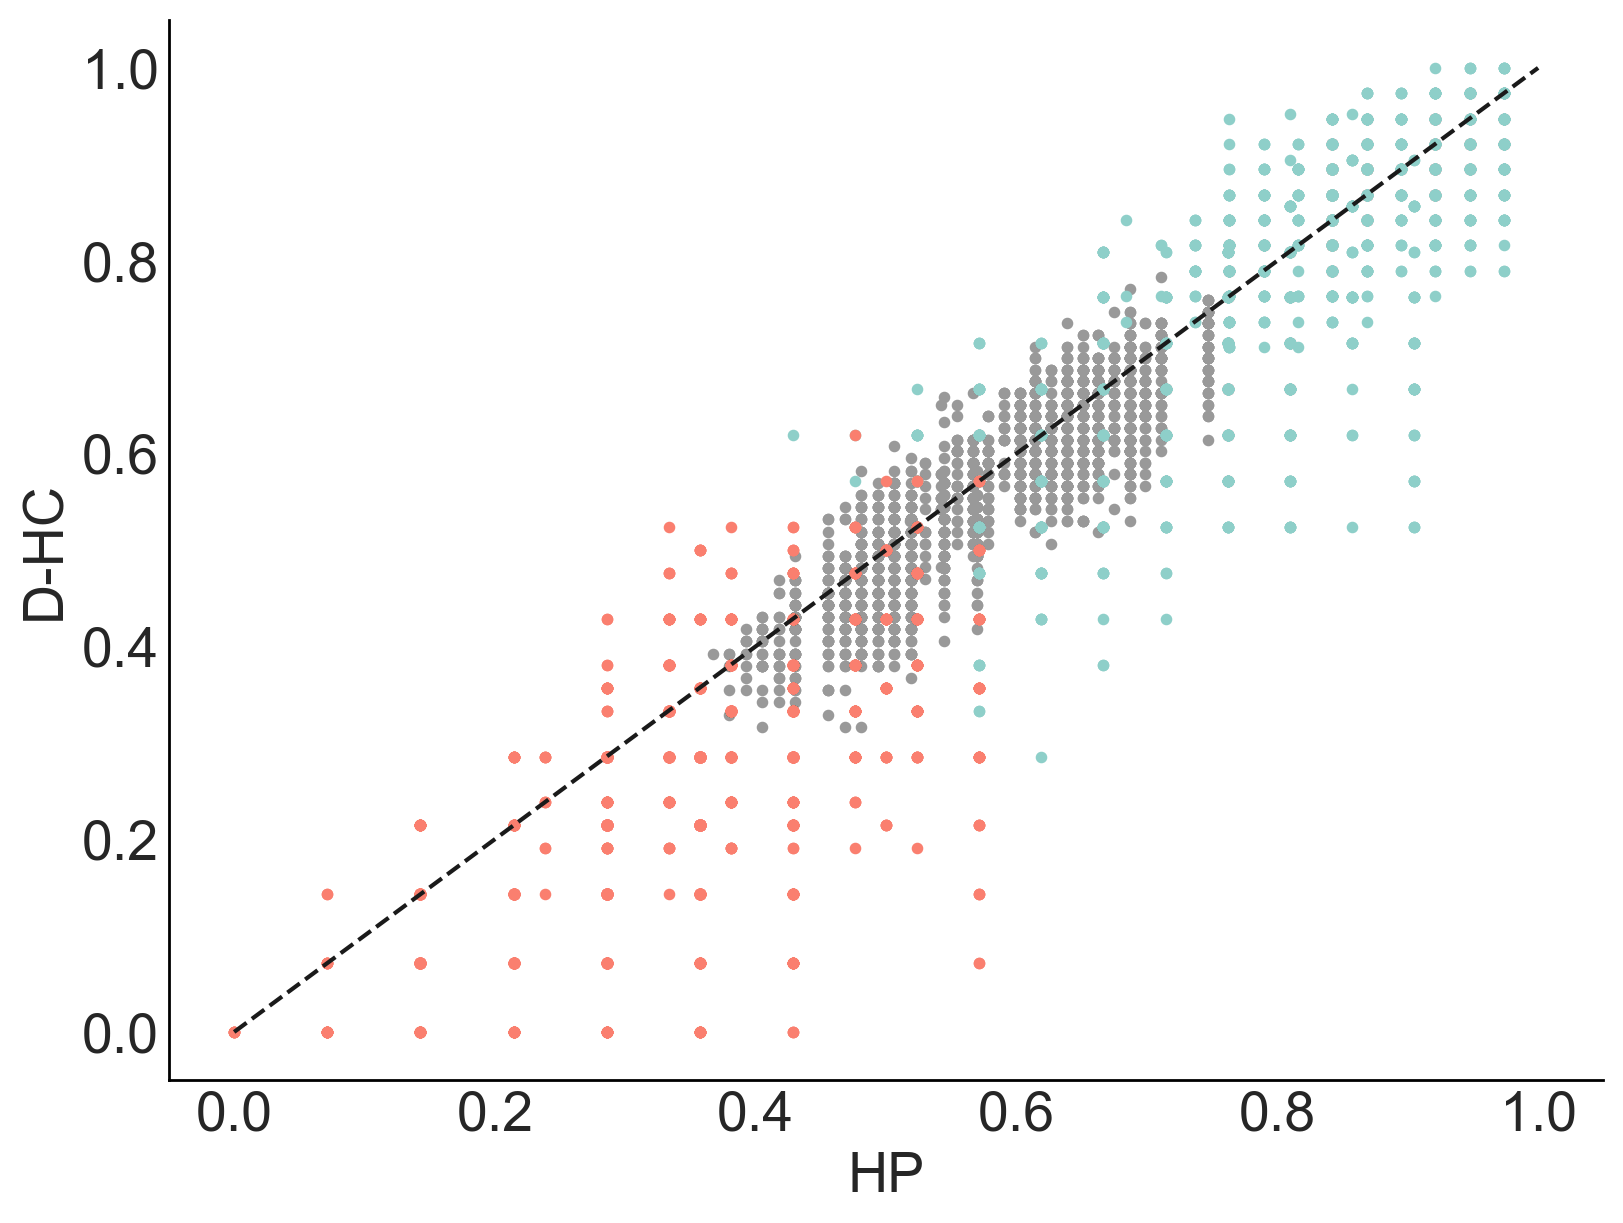

In [600]:
# Draw Scatter plot for the dyad data HC and D-HC
plt.figure(figsize=(8, 6))
plt.scatter(all_dyads['All']['HC'], all_dyads['All']['D-HC'], color=ak, s=10)
plt.scatter(set_2_all_dyads['All']['HC'], set_2_all_dyads['All']['D-HC'], color=ak, s=10)
plt.scatter(all_dyads['CC']['HC'], all_dyads['CC']['D-HC'], color=gr, s=10)
plt.scatter(set_2_all_dyads['CC']['HC'], set_2_all_dyads['CC']['D-HC'], color=gr, s=10)
plt.scatter(all_dyads['CW']['HC'], all_dyads['CW']['D-HC'], color=re, s=10)
plt.scatter(set_2_all_dyads['CW']['HC'], set_2_all_dyads['CW']['D-HC'], color=re, s=10)
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.xlabel('HP', fontsize=20)
plt.ylabel('D-HC', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [182]:
# Combine the dyad data from set 1 and set 2

all_dyads_combined = pd.DataFrame(columns=['Dyad','HC', 'LC', 'D-HC', 'D-LC', 'D-Random', 'Q_type', 'Set'])
dyads_1_2 = [all_dyads, set_2_all_dyads]
for iset in range(1,3):
    for iQ in range(len(types)):
        key = types[iQ]
        dyad_data = dyads_1_2[iset-1][key]
        for iDyad in range(len(dyad_data)):
            dyad_i_data = dyad_data.iloc[iDyad, 3:].values
            all_dyads_combined = pd.concat([all_dyads_combined, pd.DataFrame([[iDyad, dyad_i_data[0], dyad_i_data[1], dyad_i_data[2], dyad_i_data[3], dyad_i_data[4], key, iset]], columns=['Dyad','HC', 'LC', 'D-HC', 'D-LC', 'D-Random', 'Q_type', 'Set'])], axis=0)
        

In [192]:
all_dyads_combined_CC = all_dyads_combined[all_dyads_combined['Q_type'] == 'CC']
all_dyads_combined_CW = all_dyads_combined[all_dyads_combined['Q_type'] == 'CW']
all_dyads_combined_All = all_dyads_combined[all_dyads_combined['Q_type'] == 'All']
# paired t-test on HC and D-HC
print('Paired t-test for HC and D-HC for all dyads:')
print('All questions: {}'.format(stats.ttest_rel(all_dyads_combined_All['D-HC'], all_dyads_combined_All['HC'])))
print('CC questions: {}'.format(stats.ttest_rel(all_dyads_combined_CC['D-HC'], all_dyads_combined_CC['HC'])))
print('CW questions: {}'.format(stats.ttest_rel(all_dyads_combined_CW['D-HC'], all_dyads_combined_CW['HC'])))

Paired t-test for HC and D-HC for all dyads:
All questions: TtestResult(statistic=-24.786305124861492, pvalue=7.995339697136727e-121, df=2376)
CC questions: TtestResult(statistic=-19.03769185171468, pvalue=2.539995780915694e-75, df=2376)
CW questions: TtestResult(statistic=-46.19842032120406, pvalue=0.0, df=2376)


In [189]:
all_dyads_combined_long = pd.melt(all_dyads_combined, id_vars=['Q_type', 'Set'], value_vars=['HC', 'LC', 'D-HC', 'D-LC', 'D-Random'], var_name='Type', value_name='Value')
# all_dyads_combined_long.drop('Set', axis=1, inplace=True)
all_dyads_combined_long

,Q_type,Set,Type,Value
0,All,1,HC,0.614458
1,All,1,HC,0.614458
2,All,1,HC,0.614458
3,All,1,HC,0.614458
4,All,1,HC,0.614458
...,...,...,...,...
35650,CW,2,D-Random,0.244444
35651,CW,2,D-Random,0.188889
35652,CW,2,D-Random,0.300000
35653,CW,2,D-Random,0.233333


In [477]:
import dill
with open('all_dyads_combined.pkl', 'wb') as f:
    dill.dump(all_dyads_combined, f)

In [183]:
all_dyads_combined['AP'] = np.mean(all_dyads_combined[['HC', 'LC']], axis=1)
all_dyads_combined['D-HC - HC'] = all_dyads_combined['D-HC'] - all_dyads_combined['HC']

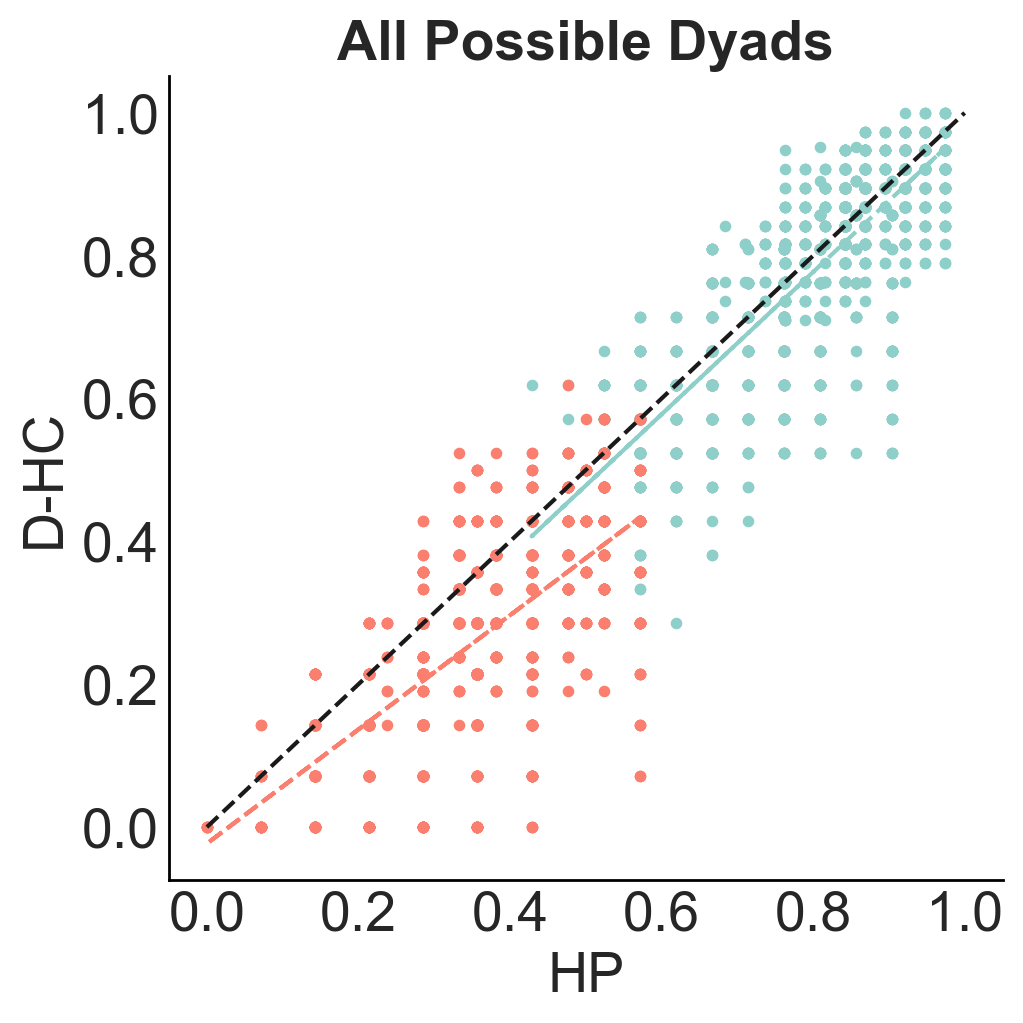

In [605]:
# Draw Scatter plot for the dyad data HC and D-HC and Draw the regression line
plt.figure(figsize=(5,5))
all_CC = all_dyads_combined[all_dyads_combined['Q_type'] == 'CC']
all_CW = all_dyads_combined[all_dyads_combined['Q_type'] == 'CW']
# plt.scatter(all_dyads_combined['HC'], all_dyads_combined['D-HC'], color=ak, s=10)
plt.scatter(all_CC['HC'], all_CC['D-HC'], color=gr, s=10)
plt.scatter(all_CW['HC'], all_CW['D-HC'], color=re, s=10)
# regression line
# CC
x = all_CC['HC'].values
y = all_CC['D-HC'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, intercept + slope*x, color=gr, linestyle='--')
# CW
x = all_CW['HC'].values
y = all_CW['D-HC'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, intercept + slope*x, color=re, linestyle='--')
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.title('All Possible Dyads', fontsize=20)
plt.xlabel('HP', fontsize=20)
plt.ylabel('D-HC', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()



In [129]:
import numpy as np

def calculate_performance_matrix(all_subj_acc, all_subj_confi, dummy_function):
    subjnum = len(all_subj_acc)
    performance_matrix = np.ones((subjnum, subjnum)) * 0.5
    avg_accuracy_matrix = np.ones((subjnum, subjnum)) * 0.5

    for i in range(subjnum):
        for j in range(subjnum):
            if i != j:
                subj_1_choice = all_subj_acc.iloc[i, :]
                subj_1_confi = all_subj_confi.iloc[i, :]
                subj_2_choice = all_subj_acc.iloc[j, :]
                subj_2_confi = all_subj_confi.iloc[j, :]

                joint_choice, joint_confi, performance = dummy_function(
                    subj_1_choice, subj_1_confi, subj_2_choice, subj_2_confi
                )

                performance_matrix[i, j] = performance
                avg_accuracy_matrix[i, j] = np.mean(joint_choice)

    return performance_matrix, avg_accuracy_matrix

# find CC, CW and Chance question
# CC_Response_set_1 = All_Response_set_1.loc[:, ['Q_{}'.format(i) for i in CC_idx_set_1]]
# CC_Response_set_1 = pd.concat([Subject, CC_Response_set_1], axis=1)
# CC_Confi_set_1 = All_Confi_set_1.loc[:, ['Q_{}'.format(i) for i in CC_idx_set_1]]
# CC_Confi_set_1 = pd.concat([Subject, CC_Confi_set_1], axis=1)
# CW_Response_set_1 = All_Response_set_1.loc[:, ['Q_{}'.format(i) for i in CW_idx_set_1]]
# CW_Response_set_1 = pd.concat([Subject, CW_Response_set_1], axis=1)
# CW_Confi_set_1 = All_Confi_set_1.loc[:, ['Q_{}'.format(i) for i in CW_idx_set_1]]
# CW_Confi_set_1 = pd.concat([Subject, CW_Confi_set_1], axis=1)
# Chance_Response_set_1 = All_Response_set_1.loc[:, ['Q_{}'.format(i) for i in Chance_idx_set_1]]
# Chance_Confi_set_1 = All_Confi_set_1.loc[:, ['Q_{}'.format(i) for i in Chance_idx_set_1]]

# CC_Response_set_2 = All_Response_set_2.loc[:, ['Q_{}'.format(i) for i in CC_idx_set_2]]
# CC_Response_set_2 = pd.concat([Subject, CC_Response_set_2], axis=1)
# CC_Confi_set_2 = All_Confi_set_2.loc[:, ['Q_{}'.format(i) for i in CC_idx_set_2]]
# CC_Confi_set_2 = pd.concat([Subject, CC_Confi_set_2], axis=1)
# CW_Response_set_2 = All_Response_set_2.loc[:, ['Q_{}'.format(i) for i in CW_idx_set_2]]
# CW_Response_set_2 = pd.concat([Subject, CW_Response_set_2], axis=1)
# CW_Confi_set_2 = All_Confi_set_2.loc[:, ['Q_{}'.format(i) for i in CW_idx_set_2]]
# CW_Confi_set_2 = pd.concat([Subject, CW_Confi_set_2], axis=1)
# Chance_Response_set_2 = All_Response_set_2.loc[:, ['Q_{}'.format(i) for i in Chance_idx_set_2]]
# Chance_Confi_set_2 = All_Confi_set_2.loc[:, ['Q_{}'.format(i) for i in Chance_idx_set_2]]

In [528]:
# Rearrange the subject order by their average accuracy
subj_ranks = list(subj_acc_set_1.keys())

All_Response_set_1_new = pd.DataFrame()
CC_Response_set_1_new = pd.DataFrame()
CW_Response_set_1_new = pd.DataFrame()
All_Confi_set_1_new = pd.DataFrame()
CC_Confi_set_1_new = pd.DataFrame()
CW_Confi_set_1_new = pd.DataFrame()
for i in range(len(subj_ranks)):
    All_Response_set_1_new = pd.concat([All_Response_set_1_new, All_Response_set_1[All_Response_set_1['Subj'] == subj_ranks[i]]], axis=0)
    All_Response_set_1_new.drop('Subj', axis=1, inplace=True)
    CC_Response_set_1_new = pd.concat([CC_Response_set_1_new, CC_Response_set_1[CC_Response_set_1['Subj'] == subj_ranks[i]]], axis=0)
    CC_Response_set_1_new.drop('Subj', axis=1, inplace=True)
    CW_Response_set_1_new = pd.concat([CW_Response_set_1_new, CW_Response_set_1[CW_Response_set_1['Subj'] == subj_ranks[i]]], axis=0)
    CW_Response_set_1_new.drop('Subj', axis=1, inplace=True)
    All_Confi_set_1_new = pd.concat([All_Confi_set_1_new, All_Confi_set_1[All_Confi_set_1['Subj'] == subj_ranks[i]]], axis=0)
    All_Confi_set_1_new.drop('Subj', axis=1, inplace=True)
    CC_Confi_set_1_new = pd.concat([CC_Confi_set_1_new, CC_Confi_set_1[CC_Confi_set_1['Subj'] == subj_ranks[i]]], axis=0)
    CC_Confi_set_1_new.drop('Subj', axis=1, inplace=True)
    CW_Confi_set_1_new = pd.concat([CW_Confi_set_1_new, CW_Confi_set_1[CW_Confi_set_1['Subj'] == subj_ranks[i]]], axis=0)
    CW_Confi_set_1_new.drop('Subj', axis=1, inplace=True)

# calculate_performance_matrix for 3 methods, then visualize the results
funcs = [Dummy_HC, Dummy_LC, Dummy_random]
Q_types = ['All', 'CC', 'CW']
Q_data_choice = [All_Response_set_1_new, CC_Response_set_1_new, CW_Response_set_1_new]
Q_data_confi = [All_Confi_set_1_new, CC_Confi_set_1_new, CW_Confi_set_1_new]
set_1_performance_matrix_dict = {}
set_1_avg_accuracy_matrix_dict = {}

rep_times = 5

for i in range(len(funcs)):
    for j in range(len(Q_types)):
        if i != 2:
            performance_matrix, avg_accuracy_matrix = calculate_performance_matrix(Q_data_choice[j], Q_data_confi[j], funcs[i])
        else:
            # for Dummy_random, we need to repeat the calculation for rep_times and take average
            performance_matrix = np.zeros((len(Q_data_choice[j]), len(Q_data_choice[j])))
            avg_accuracy_matrix = np.zeros((len(Q_data_choice[j]), len(Q_data_choice[j])))
            for k in range(rep_times):
                performance_matrix_temp, avg_accuracy_matrix_temp = calculate_performance_matrix(Q_data_choice[j], Q_data_confi[j], funcs[i])
                performance_matrix += performance_matrix_temp
                avg_accuracy_matrix += avg_accuracy_matrix_temp
            performance_matrix /= rep_times
            avg_accuracy_matrix /= rep_times
        temp_key = '{}_{}'.format(funcs[i].__name__, Q_types[j])
        set_1_performance_matrix_dict[temp_key] = performance_matrix
        set_1_avg_accuracy_matrix_dict[temp_key] = avg_accuracy_matrix
        


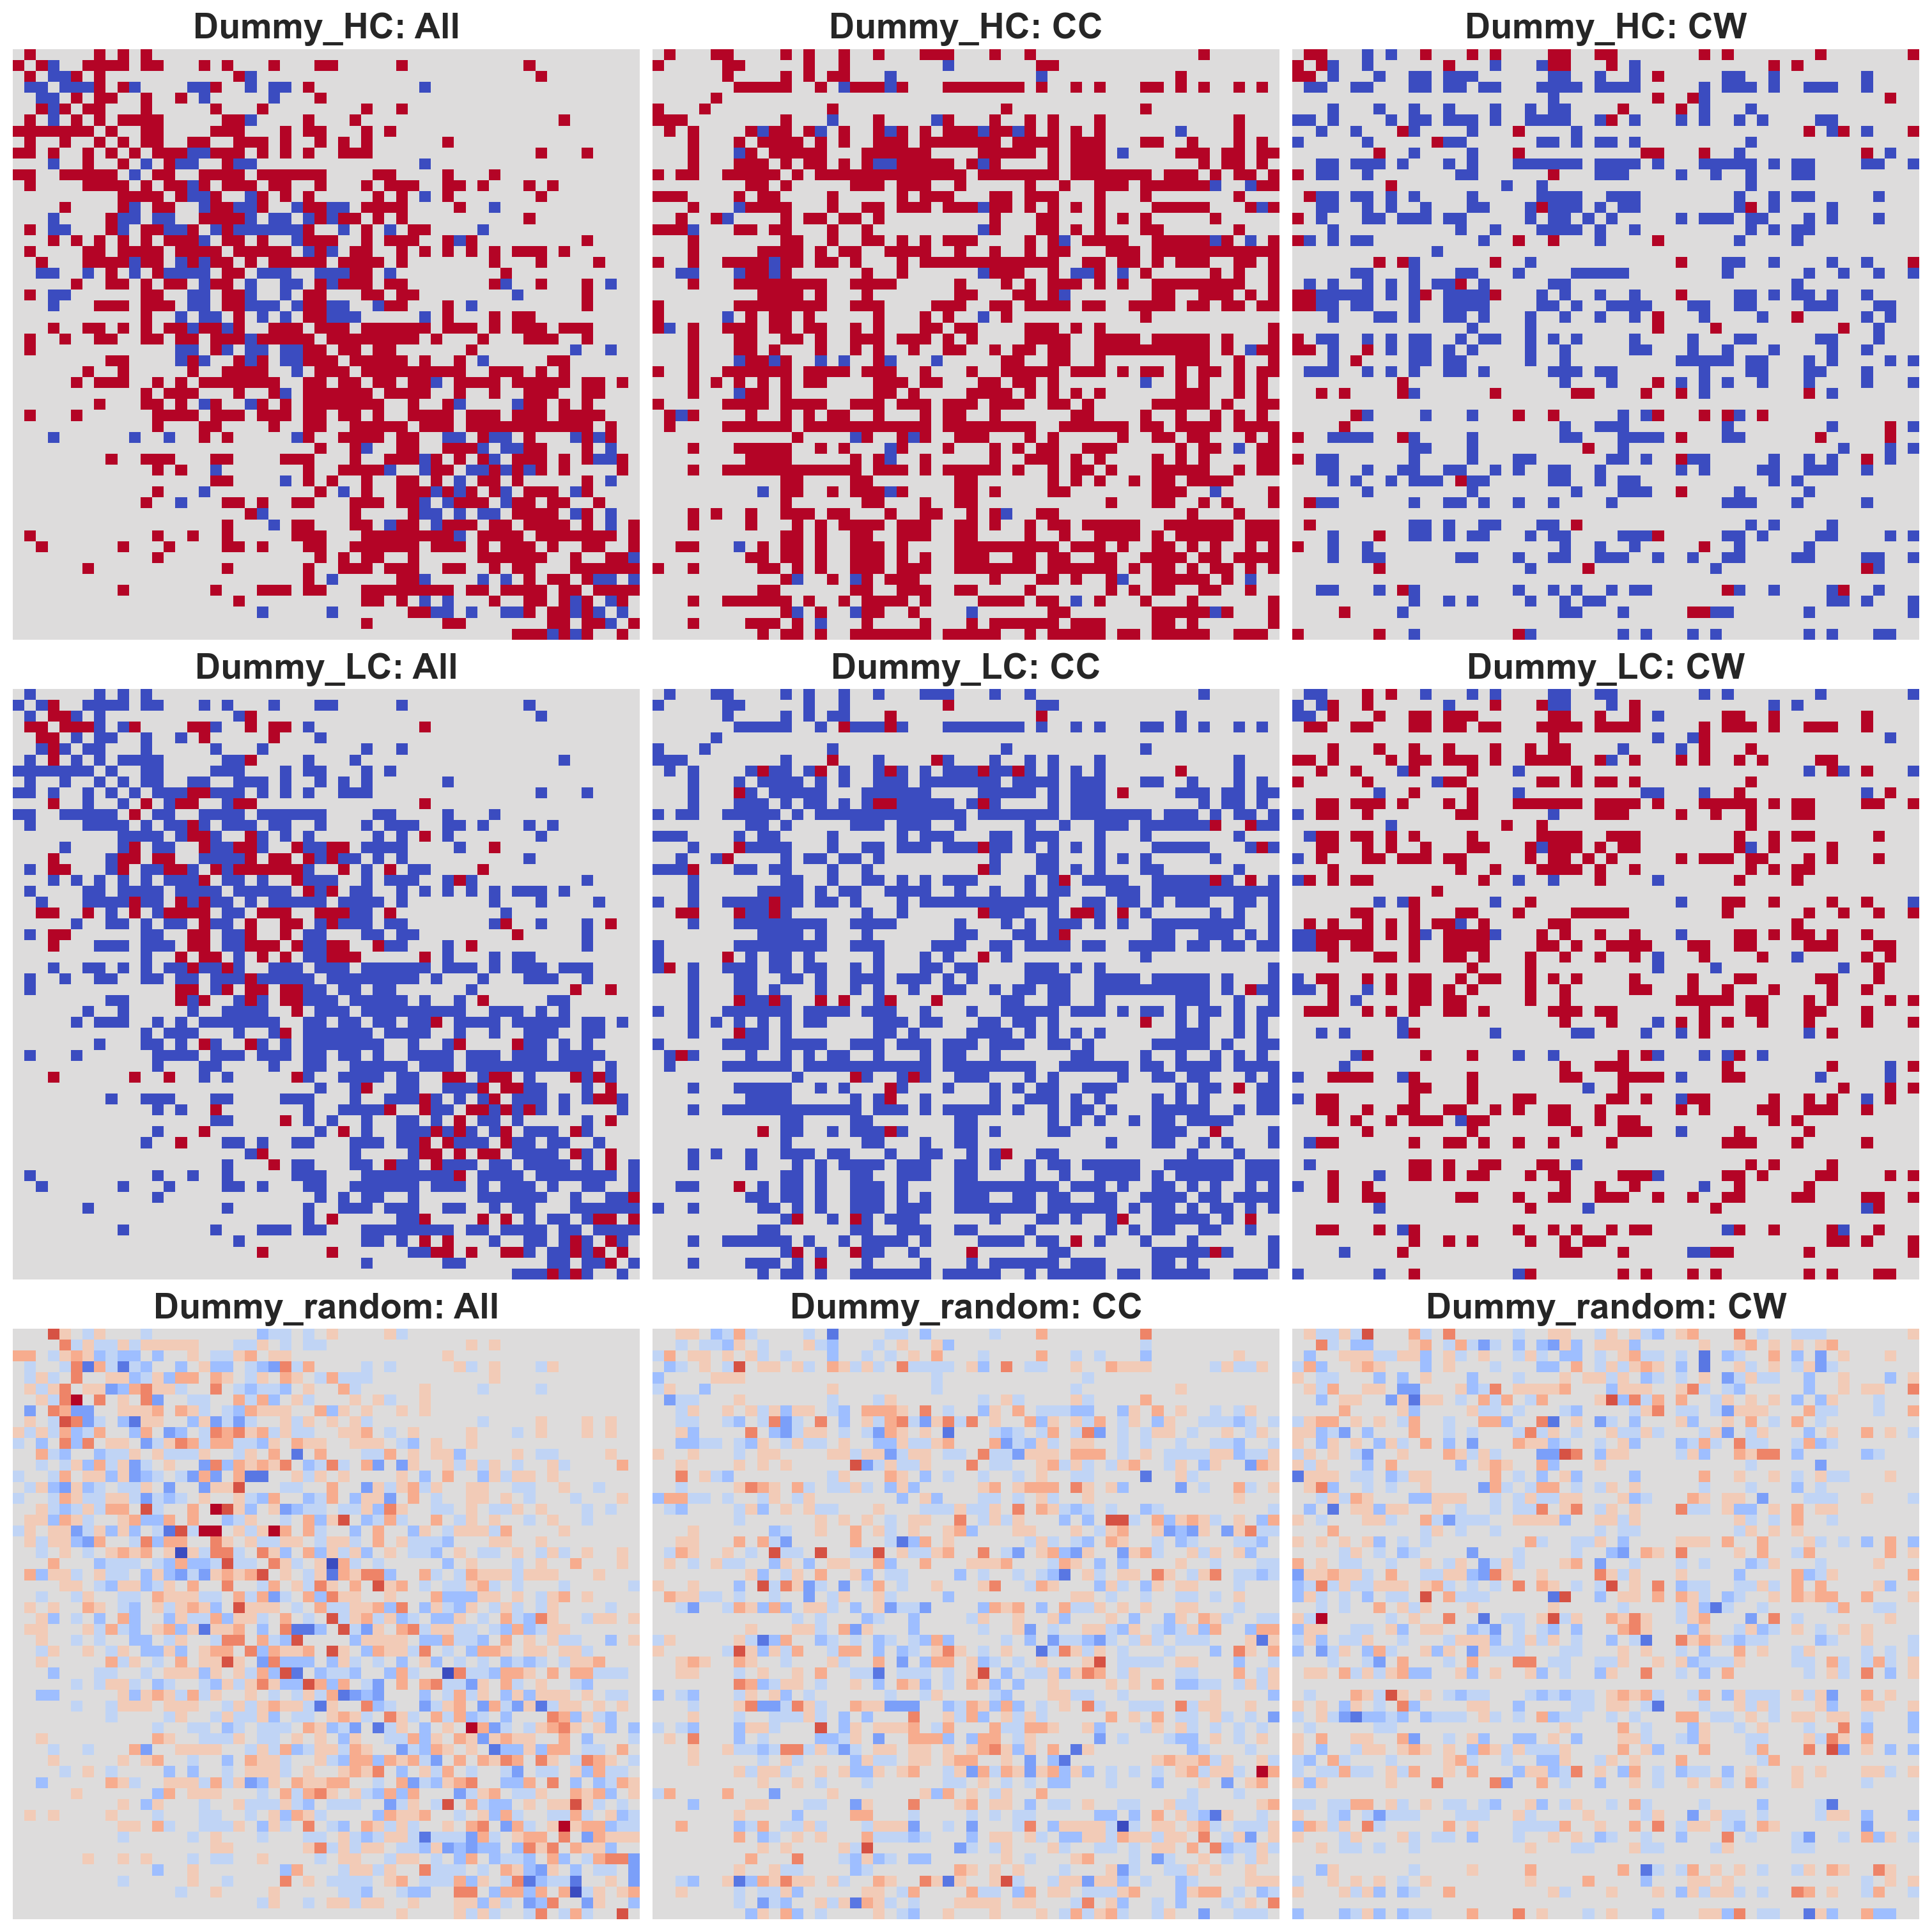

In [529]:
# visualize the results, plot row for 3 func, column for 3 types
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(len(funcs)):
    for j in range(len(Q_types)):
        temp_key = '{}_{}'.format(funcs[i].__name__, Q_types[j])
        sns.heatmap(set_1_performance_matrix_dict[temp_key], ax=ax[i, j], cmap='coolwarm', vmin=0, vmax=1, cbar=False)
        ax[i, j].set_title('{}: {}'.format(funcs[i].__name__, Q_types[j]), fontsize=20, fontweight='bold')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()

In [177]:
# calculate_performance_matrix for 3 methods, then visualize the results
subj_ranks = list(subj_acc_set_2.keys())

All_Response_set_2_new = pd.DataFrame()
CC_Response_set_2_new = pd.DataFrame()
CW_Response_set_2_new = pd.DataFrame()
All_Confi_set_2_new = pd.DataFrame()
CC_Confi_set_2_new = pd.DataFrame()
CW_Confi_set_2_new = pd.DataFrame()
for i in range(len(subj_ranks)):
    All_Response_set_2_new = pd.concat([All_Response_set_2_new, All_Response_set_2[All_Response_set_2['Subj'] == subj_ranks[i]]], axis=0)
    All_Response_set_2_new.drop('Subj', axis=1, inplace=True)
    CC_Response_set_2_new = pd.concat([CC_Response_set_2_new, CC_Response_set_2[CC_Response_set_2['Subj'] == subj_ranks[i]]], axis=0)
    CC_Response_set_2_new.drop('Subj', axis=1, inplace=True)
    CW_Response_set_2_new = pd.concat([CW_Response_set_2_new, CW_Response_set_2[CW_Response_set_2['Subj'] == subj_ranks[i]]], axis=0)
    CW_Response_set_2_new.drop('Subj', axis=1, inplace=True)
    All_Confi_set_2_new = pd.concat([All_Confi_set_2_new, All_Confi_set_2[All_Confi_set_2['Subj'] == subj_ranks[i]]], axis=0)
    All_Confi_set_2_new.drop('Subj', axis=1, inplace=True)
    CC_Confi_set_2_new = pd.concat([CC_Confi_set_2_new, CC_Confi_set_2[CC_Confi_set_2['Subj'] == subj_ranks[i]]], axis=0)
    CC_Confi_set_2_new.drop('Subj', axis=1, inplace=True)
    CW_Confi_set_2_new = pd.concat([CW_Confi_set_2_new, CW_Confi_set_2[CW_Confi_set_2['Subj'] == subj_ranks[i]]], axis=0)
    CW_Confi_set_2_new.drop('Subj', axis=1, inplace=True)


funcs = [Dummy_HC, Dummy_LC, Dummy_random]
Q_types = ['All', 'CC', 'CW']
Q_data_choice = [All_Response_set_2_new, CC_Response_set_2_new, CW_Response_set_2_new]
Q_data_confi = [All_Confi_set_2_new, CC_Confi_set_2_new, CW_Confi_set_2_new]
set_2_performance_matrix_dict = {}
set_2_avg_accuracy_matrix_dict = {}

rep_times = 5

for i in range(len(funcs)):
    for j in range(len(Q_types)):
        if i != 2:
            performance_matrix, avg_accuracy_matrix = calculate_performance_matrix(Q_data_choice[j], Q_data_confi[j], funcs[i])
        else:
            # for Dummy_random, we need to repeat the calculation for rep_times and take average
            performance_matrix = np.zeros((len(Q_data_choice[j]), len(Q_data_choice[j])))
            avg_accuracy_matrix = np.zeros((len(Q_data_choice[j]), len(Q_data_choice[j])))
            for k in range(rep_times):
                performance_matrix_temp, avg_accuracy_matrix_temp = calculate_performance_matrix(Q_data_choice[j], Q_data_confi[j], funcs[i])
                performance_matrix += performance_matrix_temp
                avg_accuracy_matrix += avg_accuracy_matrix_temp
            performance_matrix /= rep_times
            avg_accuracy_matrix /= rep_times
        temp_key = '{}_{}'.format(funcs[i].__name__, Q_types[j])
        set_2_performance_matrix_dict[temp_key] = performance_matrix
        set_2_avg_accuracy_matrix_dict[temp_key] = avg_accuracy_matrix
        

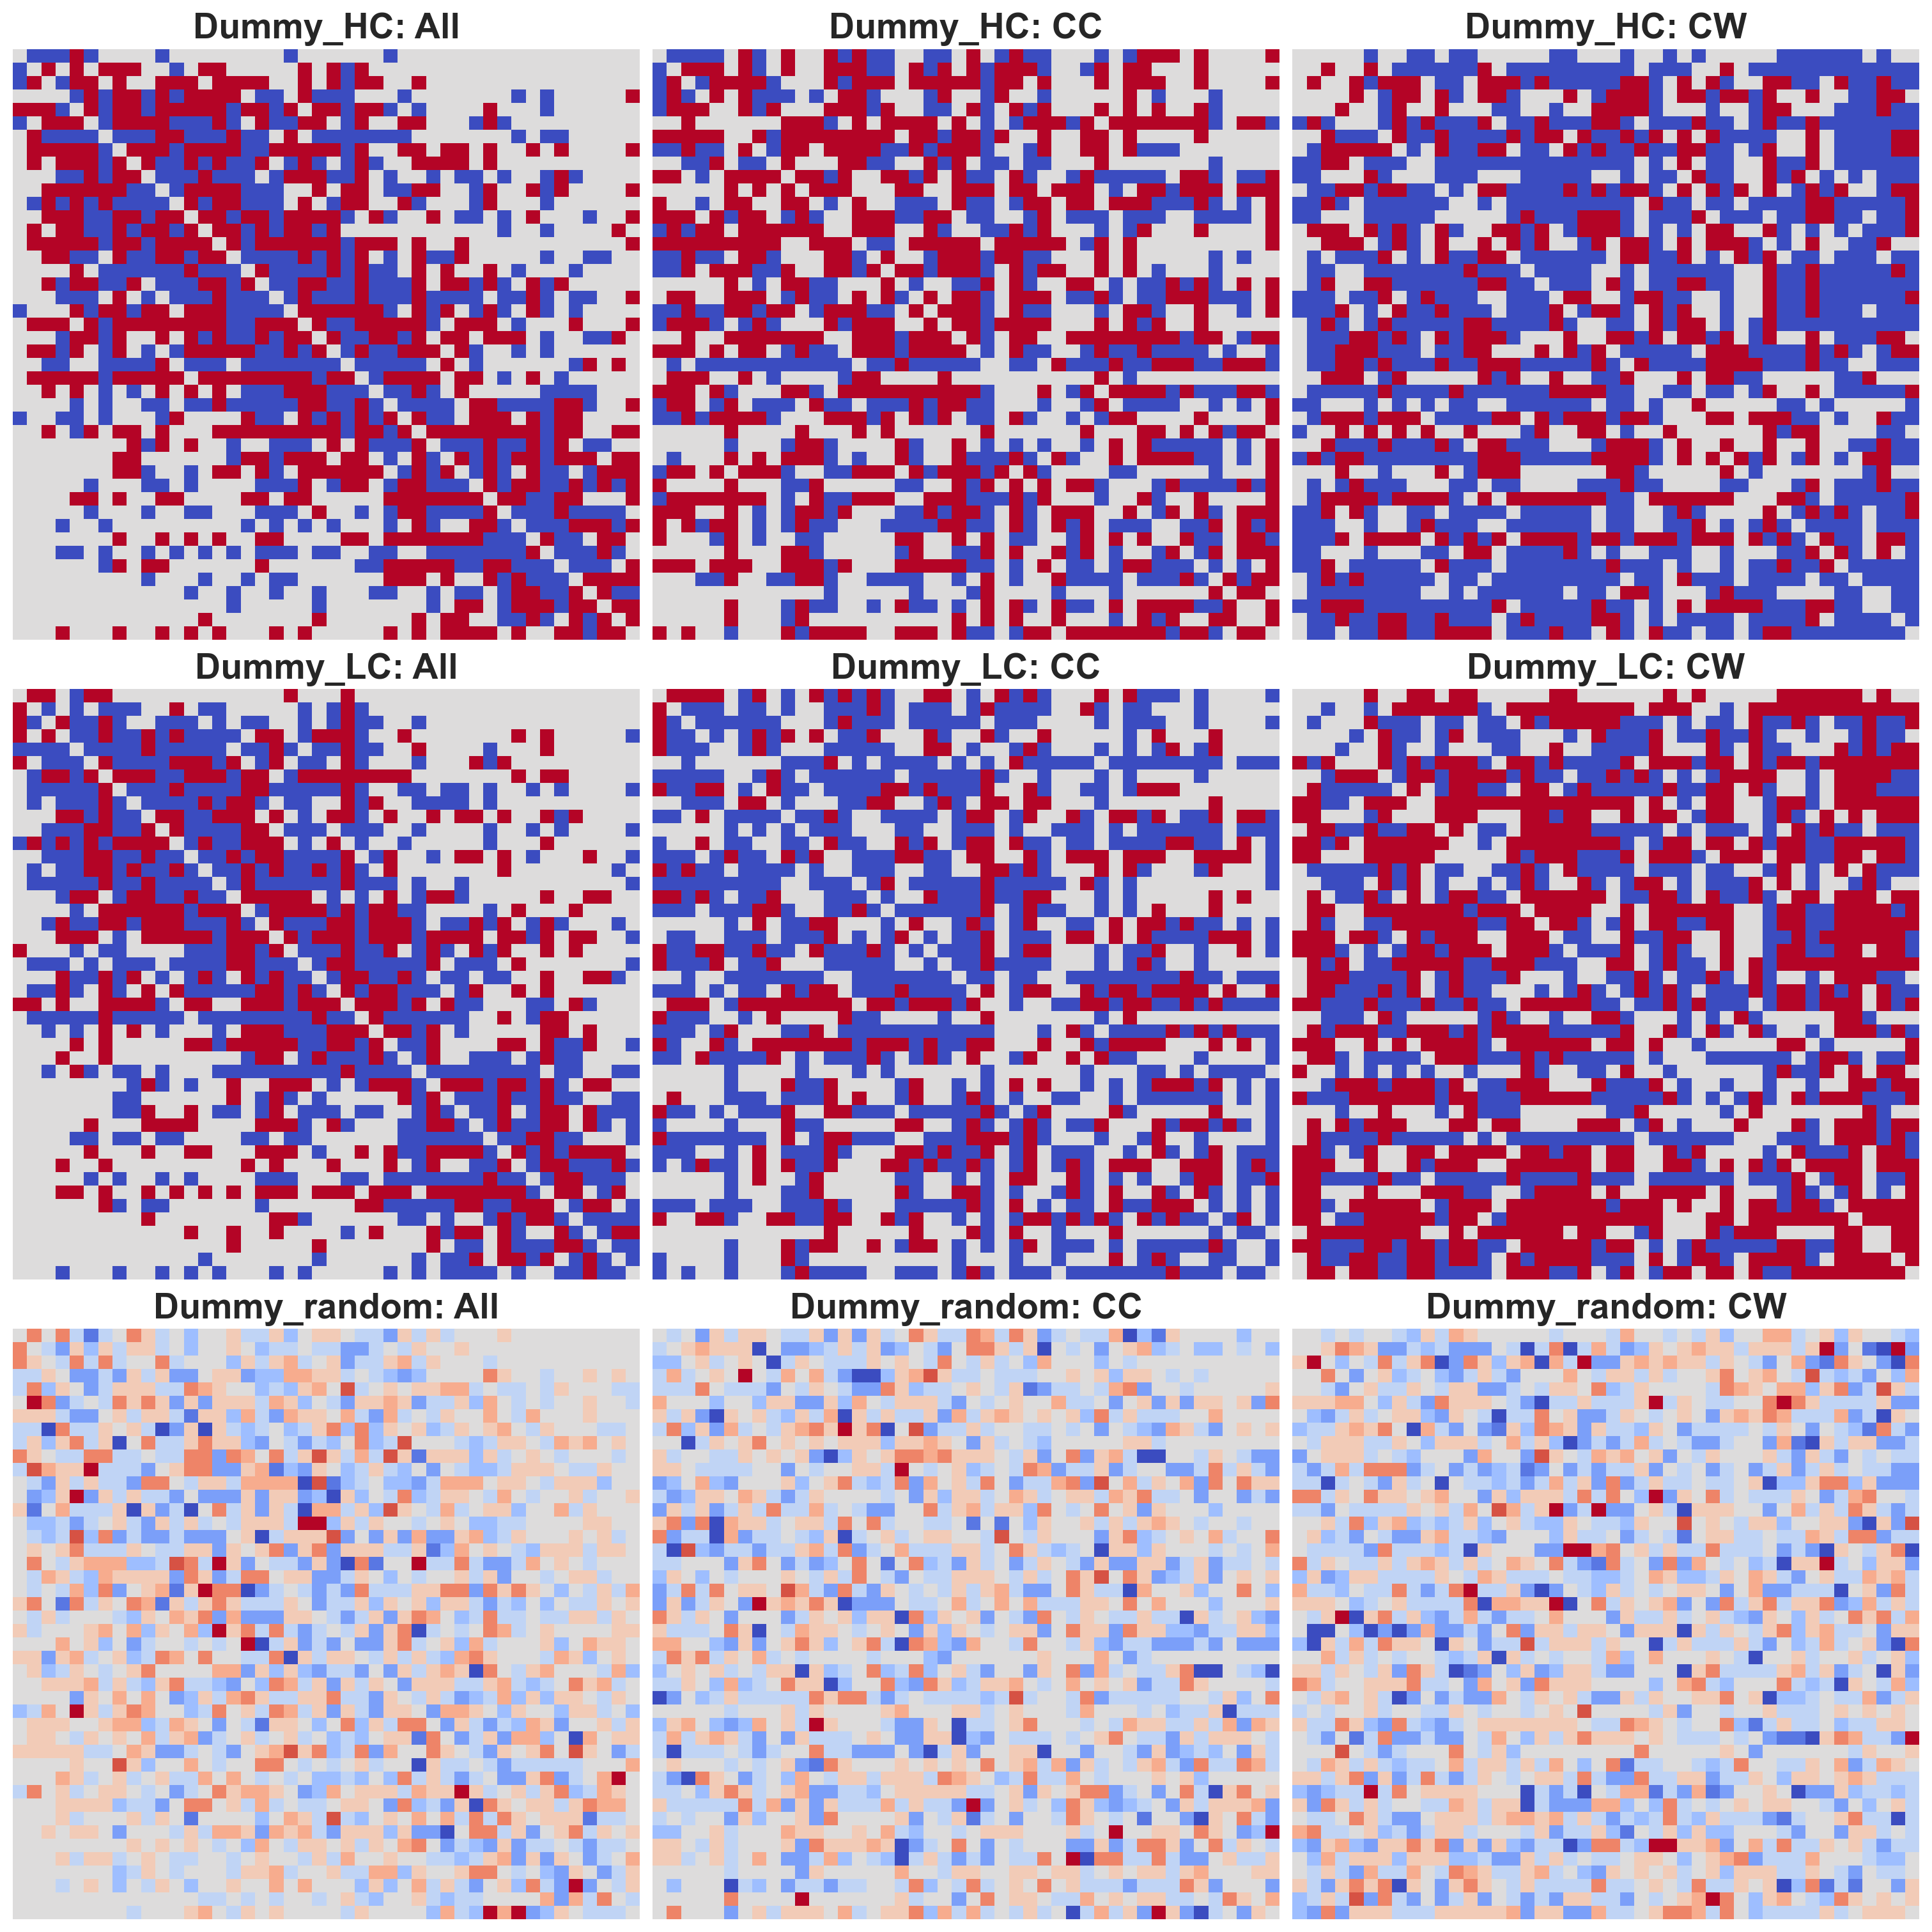

In [178]:
# visualize the results, plot row for 3 func, column for 3 types
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(len(funcs)):
    for j in range(len(Q_types)):
        temp_key = '{}_{}'.format(funcs[i].__name__, Q_types[j])
        sns.heatmap(set_2_performance_matrix_dict[temp_key], ax=ax[i, j], cmap='coolwarm', vmin=0, vmax=1, cbar=False)
        ax[i, j].set_title('{}: {}'.format(funcs[i].__name__, Q_types[j]), fontsize=20, fontweight='bold')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()